# Data Modelling (Variant II)

---

The modelling for this variant follows the same process as the Base dataset.

In [1]:
%run ../functions.py

In [2]:
X_train_v2_scaled = pd.read_csv('../Data/var2/X_train_v2_scaled.csv')
y_train_v2 = pd.read_csv('../Data/var2/y_train_v2.csv')
X_val_v2_scaled = pd.read_csv('../Data/var2/X_val_v2_scaled.csv')
y_val_v2 = pd.read_csv('../Data/var2/y_val_v2.csv')
X_test_v2_scaled = pd.read_csv('../Data/var2/X_test_v2_scaled.csv')
y_test_v2 = pd.read_csv('../Data/var2/y_test_v2.csv')

---

### Baseline Model

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

v2_baseline_model = DummyClassifier(random_state=21)

v2_baseline_model.fit(X_train_v2_scaled, y_train_v2)

v2_baseline_results = cross_val_score(v2_baseline_model,
                                      X_train_v2_scaled,
                                      y_train_v2,
                                      scoring='recall',
                                      cv=10).mean()

print(f"Train recall: {v2_baseline_results}")

Train recall: 0.011654186214363049


---

### First Model Iteration

---

In [4]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

n_features = X_train_v2_scaled.shape[1]

In [5]:
def modelling_v1(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v1 = models.Sequential()

    model_v1.add(layers.Input(shape=(n_features, )))
    model_v1.add(layers.Dense(32, activation='relu'))
    model_v1.add(layers.Dense(16, activation='relu'))
    model_v1.add(layers.Dense(1, activation='sigmoid'))

    model_v1.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v1_history = model_v1.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v1,
             name,
             model_v1_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00010: early stopping
Results for Variant II Model V1 with threshold = 0.5.

 Train f1: 0.0405742076097042 
 Val f1: 0.05921052606925342 

 Train Recall: 0.02097902074456215 
 Val Recall: 0.031034482643008232 

 Train FPR: 0.00013598715304397047 
 Val FPR: 0.00023426226107403636


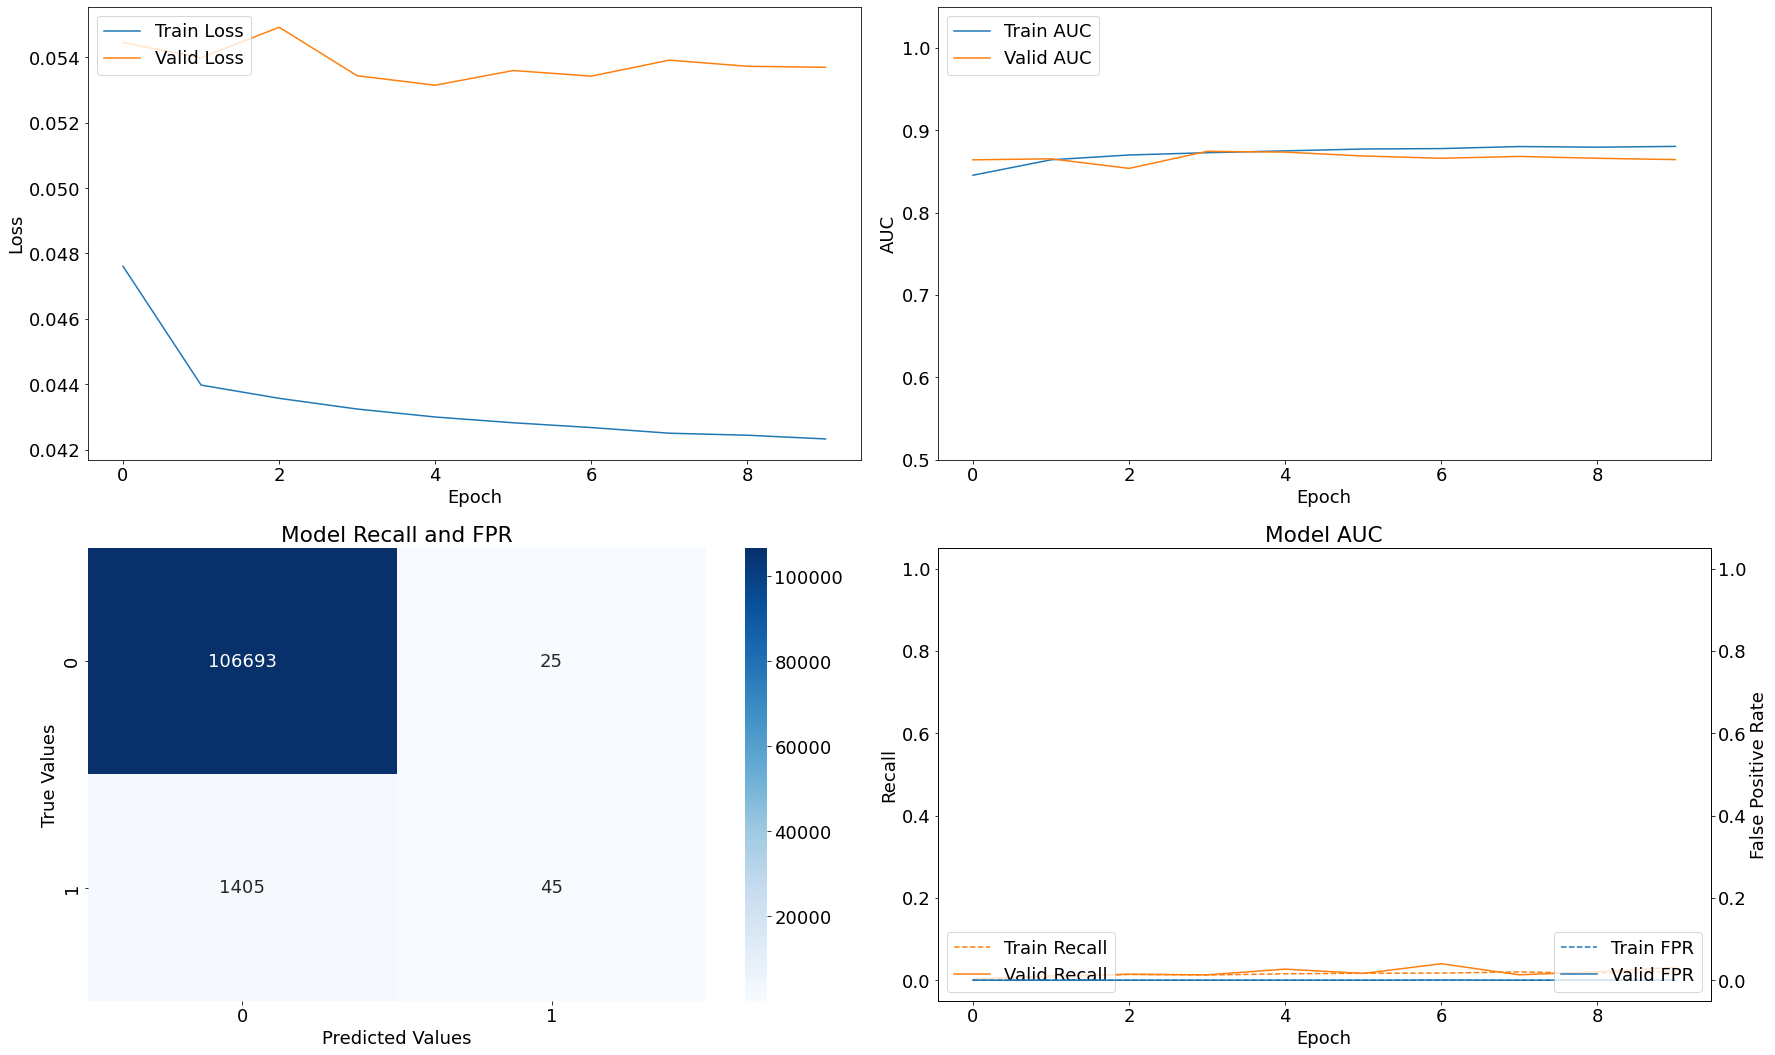

In [6]:
modelling_v1(X_train_v2_scaled,
             y_train_v2,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V1')

---

### Second Model Iteration

In [7]:
def modelling_v2(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v2 = models.Sequential()

    model_v2.add(layers.Input(shape=(n_features, )))
    model_v2.add(layers.Dense(32, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(16, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(1, activation='sigmoid'))

    model_v2.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['AUC',
                                   tf.keras.metrics.Precision(thresholds=threshold),
                                   tf.keras.metrics.Recall(thresholds=threshold),
                                   FalsePositiveRate(threshold=threshold)])

    model_v2_history = model_v2.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v2,
             name,
             model_v2_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00018: early stopping
Results for Variant II Model V2 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.008342534303665161 
 Val Recall: 0.0 

 Train FPR: 8.133811206789687e-05 
 Val FPR: 0.0


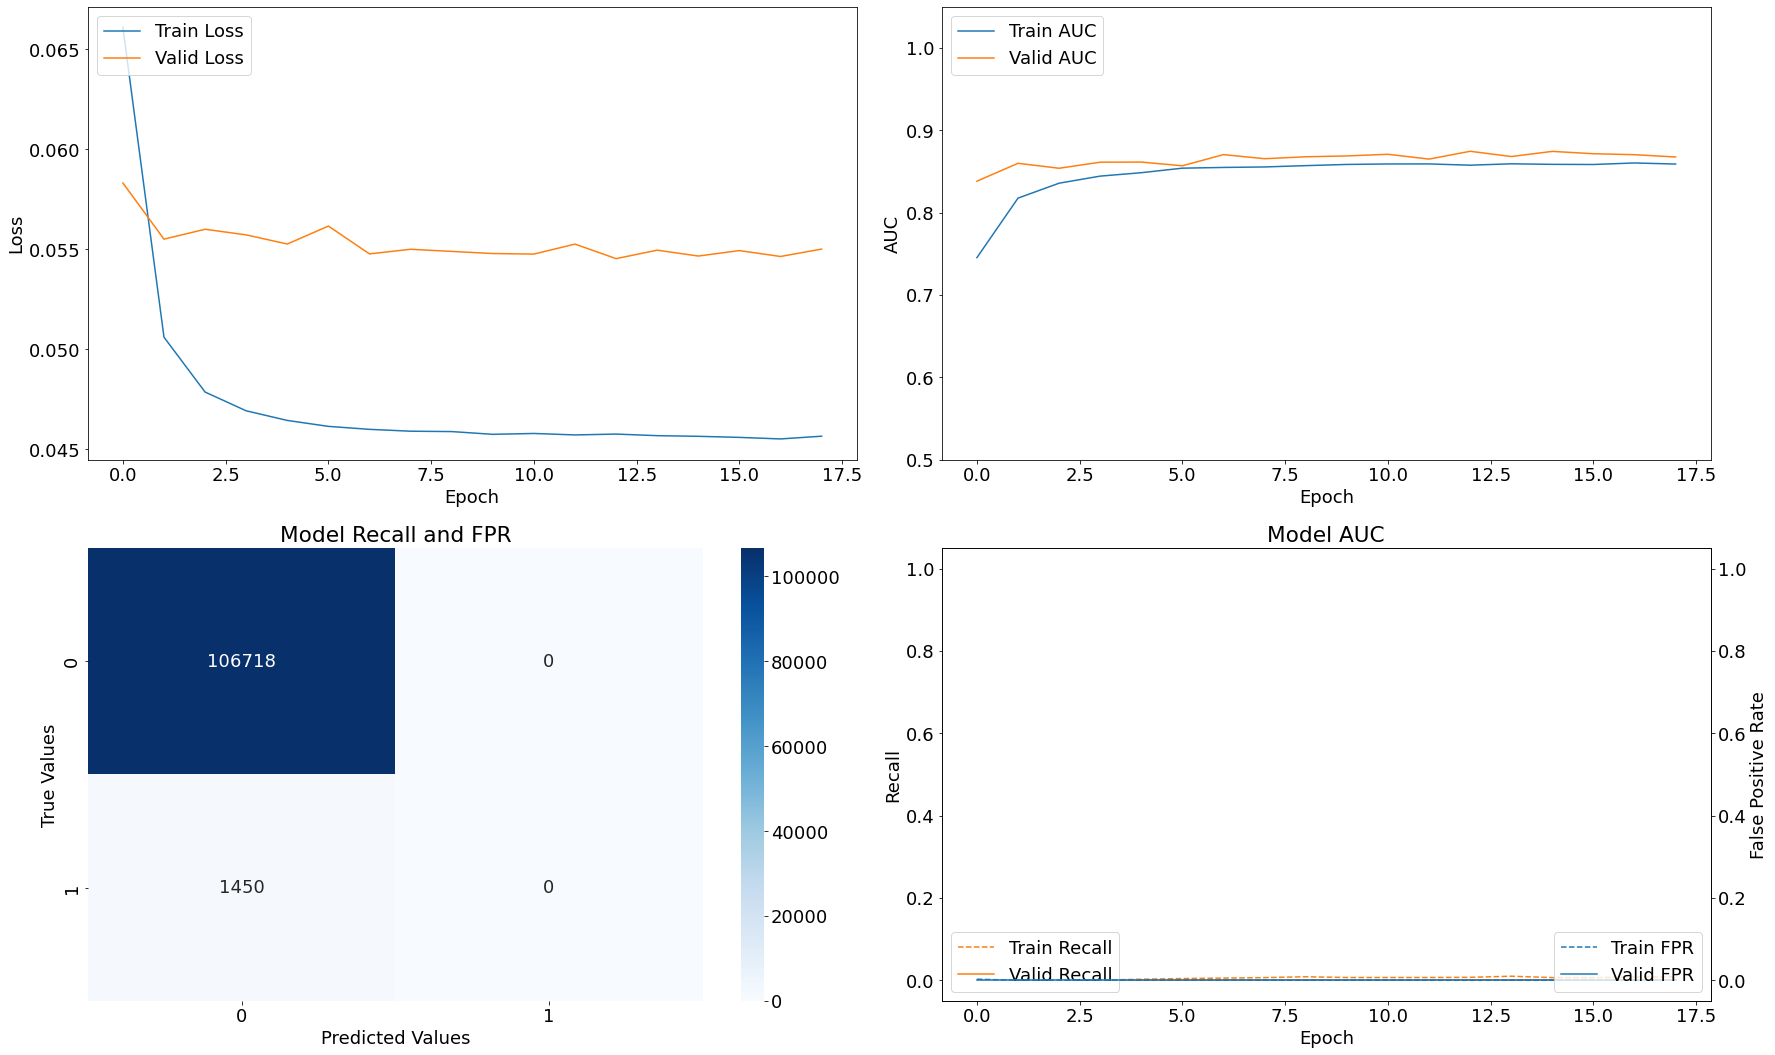

In [8]:
modelling_v2(X_train_v2_scaled,
             y_train_v2,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V2')

---

### Third Model Iteration

In [9]:
class_weight = create_class_weight({0: len(y_train_v2 == 0), 1: len(y_train_v2 == 1)})

In [10]:
def modelling_v3(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v3 = models.Sequential()

    model_v3.add(layers.Input(shape=(n_features, )))
    model_v3.add(layers.Dense(32, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(16, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(1, activation='sigmoid'))

    model_v3.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v3_history = model_v3.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v3,
             name,
             model_v3_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00011: early stopping
Results for Variant II Model V3 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0077291131019592285 
 Val Recall: 0.0 

 Train FPR: 0.00011311081470921636 
 Val FPR: 0.0


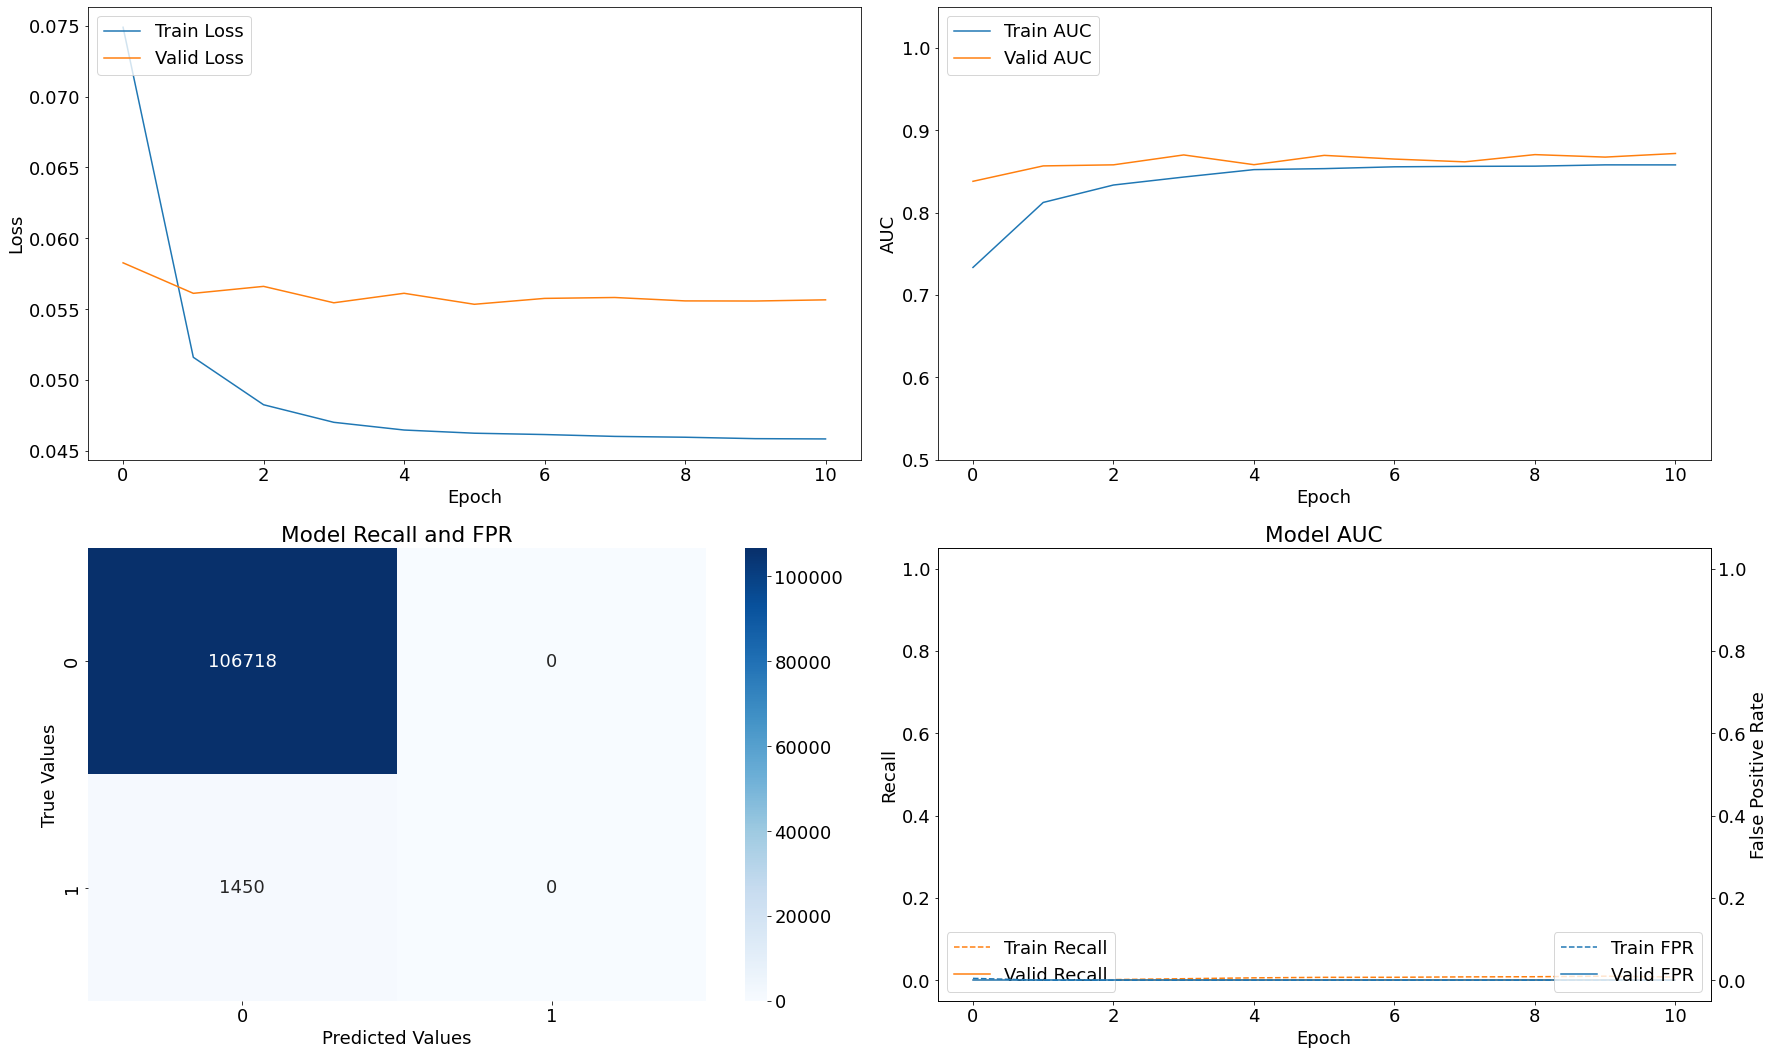

In [11]:
modelling_v3(X_train_v2_scaled,
             y_train_v2,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V3')

---

### Fourth Model Iteration

In [12]:
X_train_v2_scaled_resampled = pd.read_csv('../Data/var2/X_train_v2_scaled_resampled.csv')
y_train_v2_resampled = pd.read_csv('../Data/var2/y_train_v2_resampled.csv')

In [13]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

In [14]:
def modelling_v4(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):    
    
    model_v4 = models.Sequential()

    model_v4.add(layers.Input(shape=(n_features, )))
    model_v4.add(layers.Dense(32, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(16, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(1, activation='sigmoid'))

    model_v4.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v4_history = model_v4.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history

    evaluate(model_v4,
             'Base Model V4',
             model_v4_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00013: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6922003148091084 
 Val f1: 0.22049630530742545 

 Train Recall: 0.6288477182388306 
 Val Recall: 0.4013793170452118 

 Train FPR: 0.0470261387526989 
 Val FPR: 0.030425982549786568


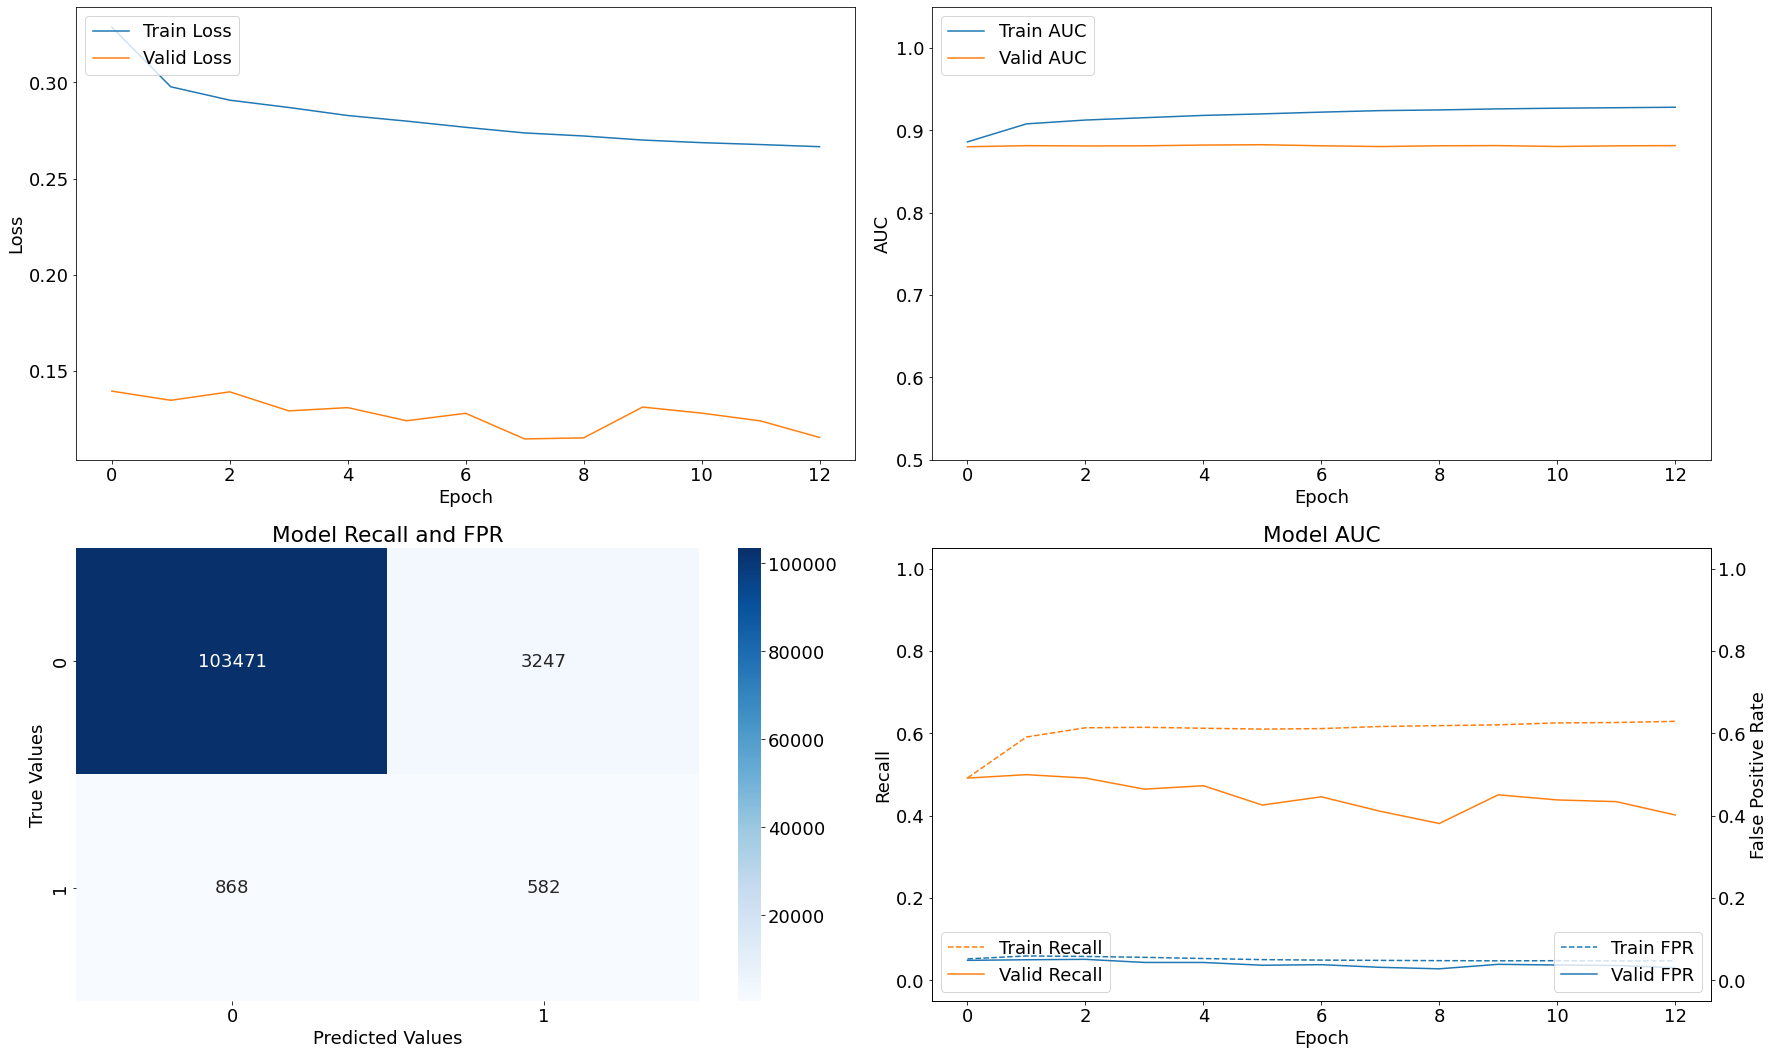

Epoch 00019: early stopping
Results for Base Model V4 with threshold = 0.4.

 Train f1: 0.7312626855960449 
 Val f1: 0.18278401903874972 

 Train Recall: 0.7473984360694885 
 Val Recall: 0.522068977355957 

 Train FPR: 0.0741828978061676 
 Val FPR: 0.05693510174751282


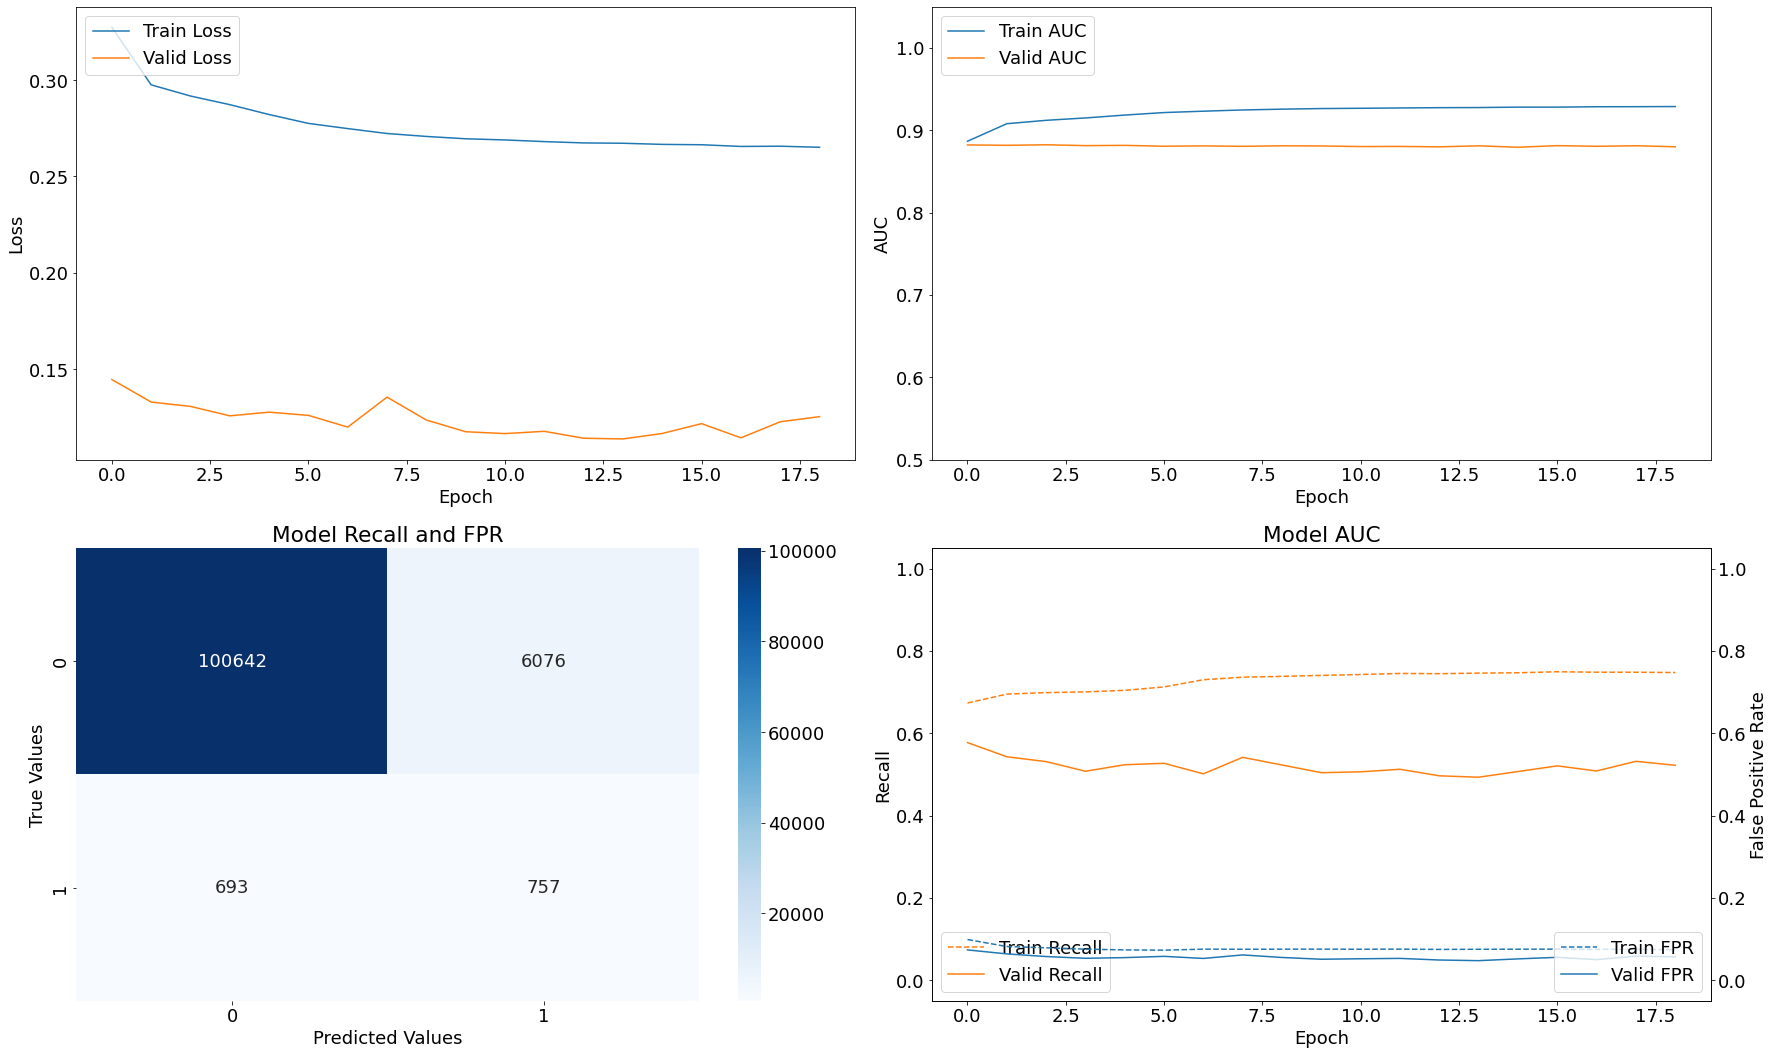

Epoch 00019: early stopping
Results for Base Model V4 with threshold = 0.3.

 Train f1: 0.7194981186337405 
 Val f1: 0.16515512643690322 

 Train Recall: 0.8273337483406067 
 Val Recall: 0.5965517163276672 

 Train FPR: 0.11810421198606491 
 Val FPR: 0.07646320015192032


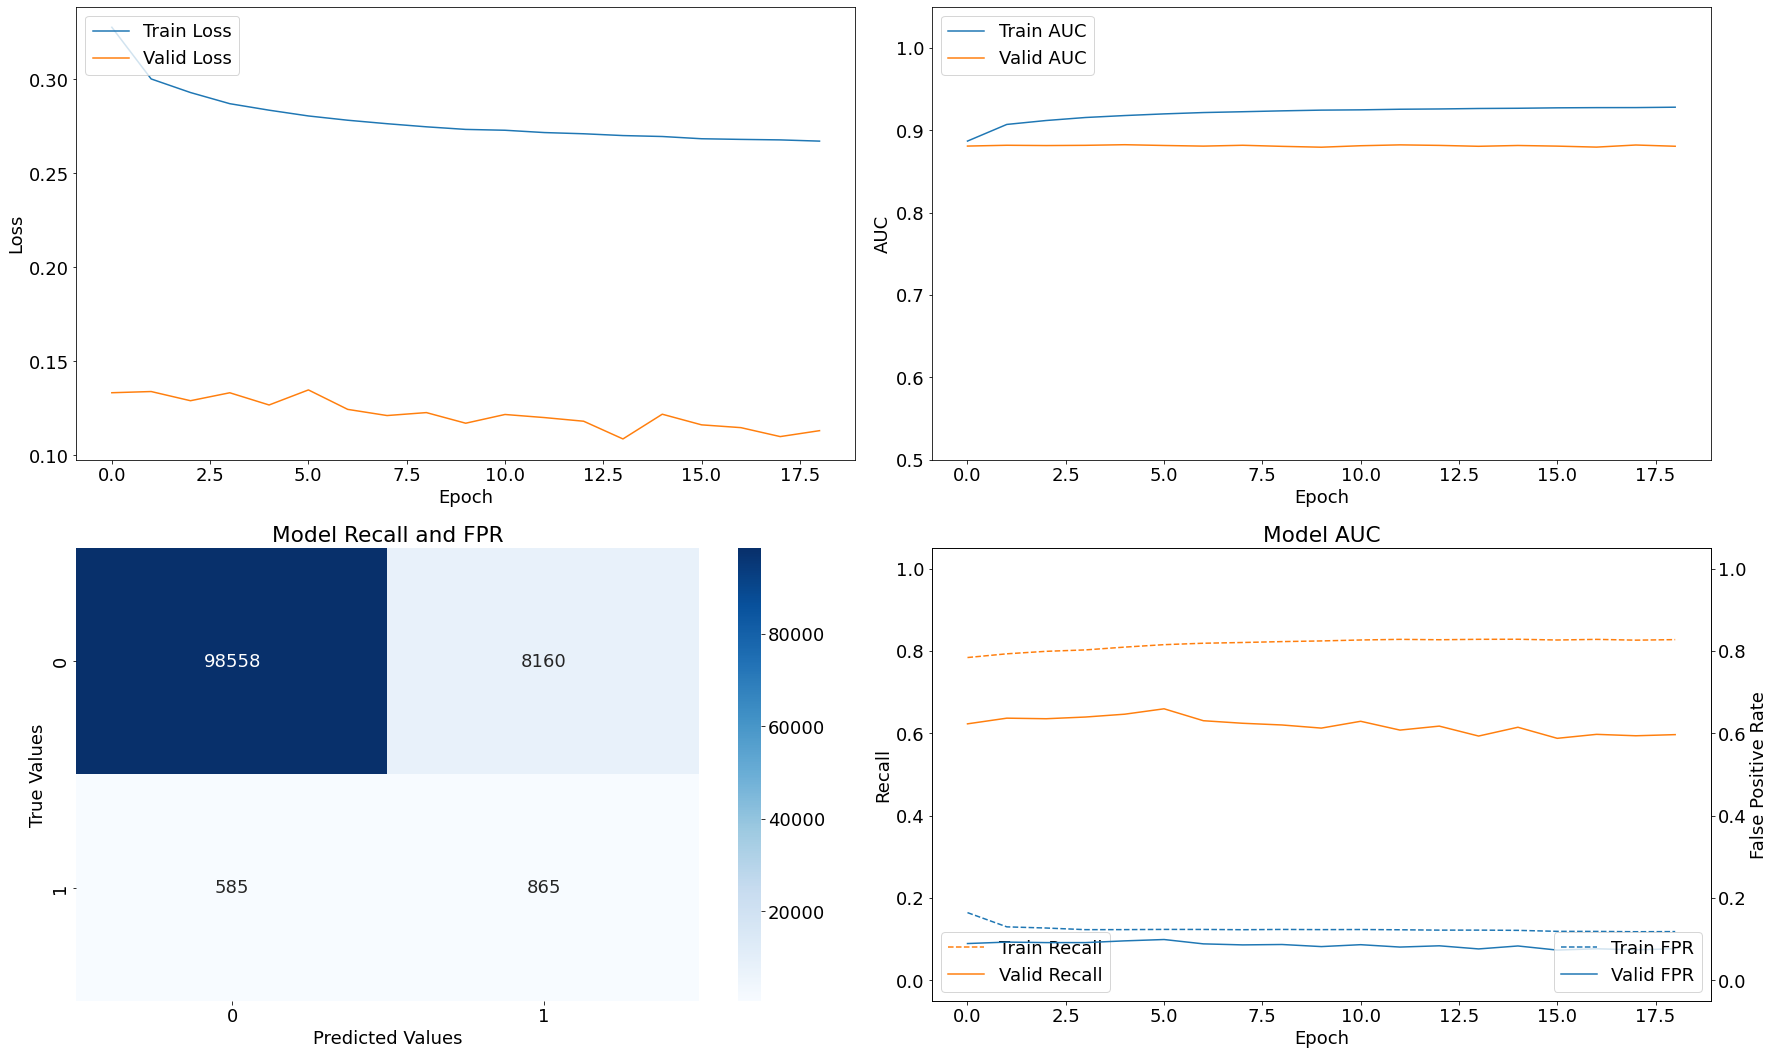

Epoch 00014: early stopping
Results for Base Model V4 with threshold = 0.2.

 Train f1: 0.6850263627271749 
 Val f1: 0.1297969149559542 

 Train Recall: 0.8944582939147949 
 Val Recall: 0.6986206769943237 

 Train FPR: 0.1792488694190979 
 Val FPR: 0.12318446487188339


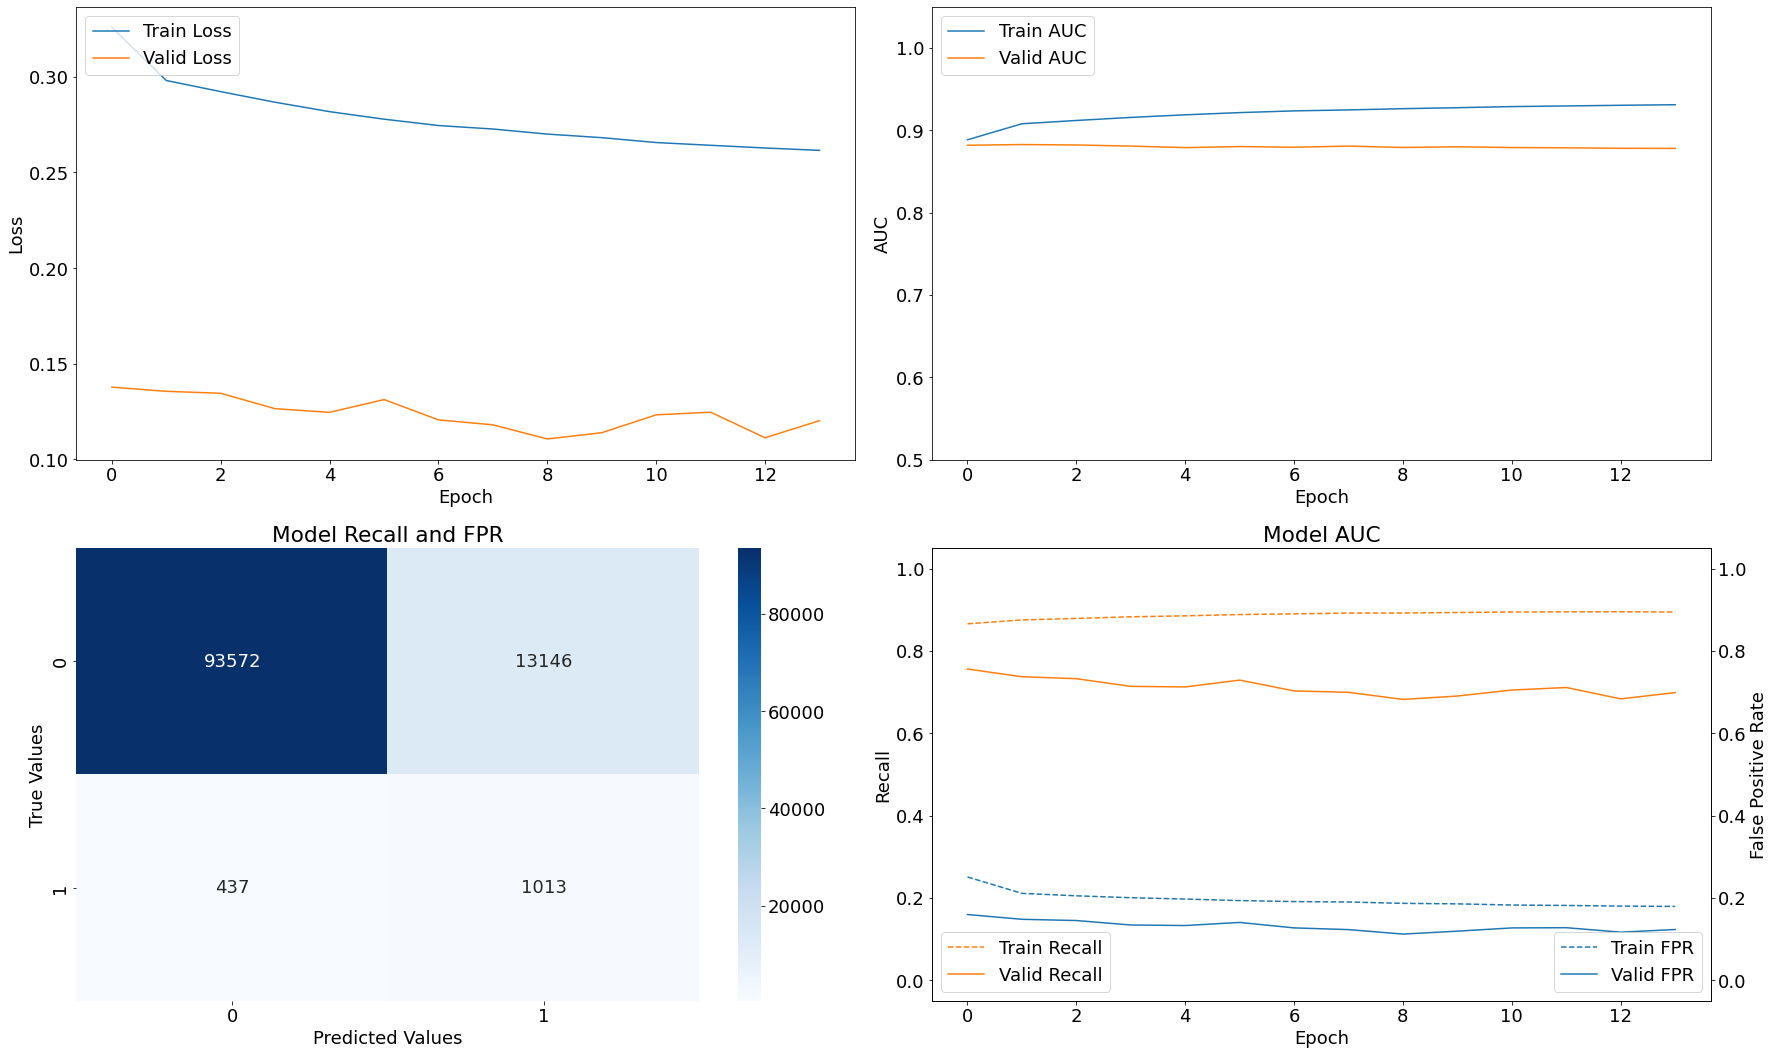

Epoch 00015: early stopping
Results for Base Model V4 with threshold = 0.1.

 Train f1: 0.6129982782738022 
 Val f1: 0.09306333214199644 

 Train Recall: 0.9427478909492493 
 Val Recall: 0.8193103671073914 

 Train FPR: 0.2832764983177185 
 Val FPR: 0.21451863646507263


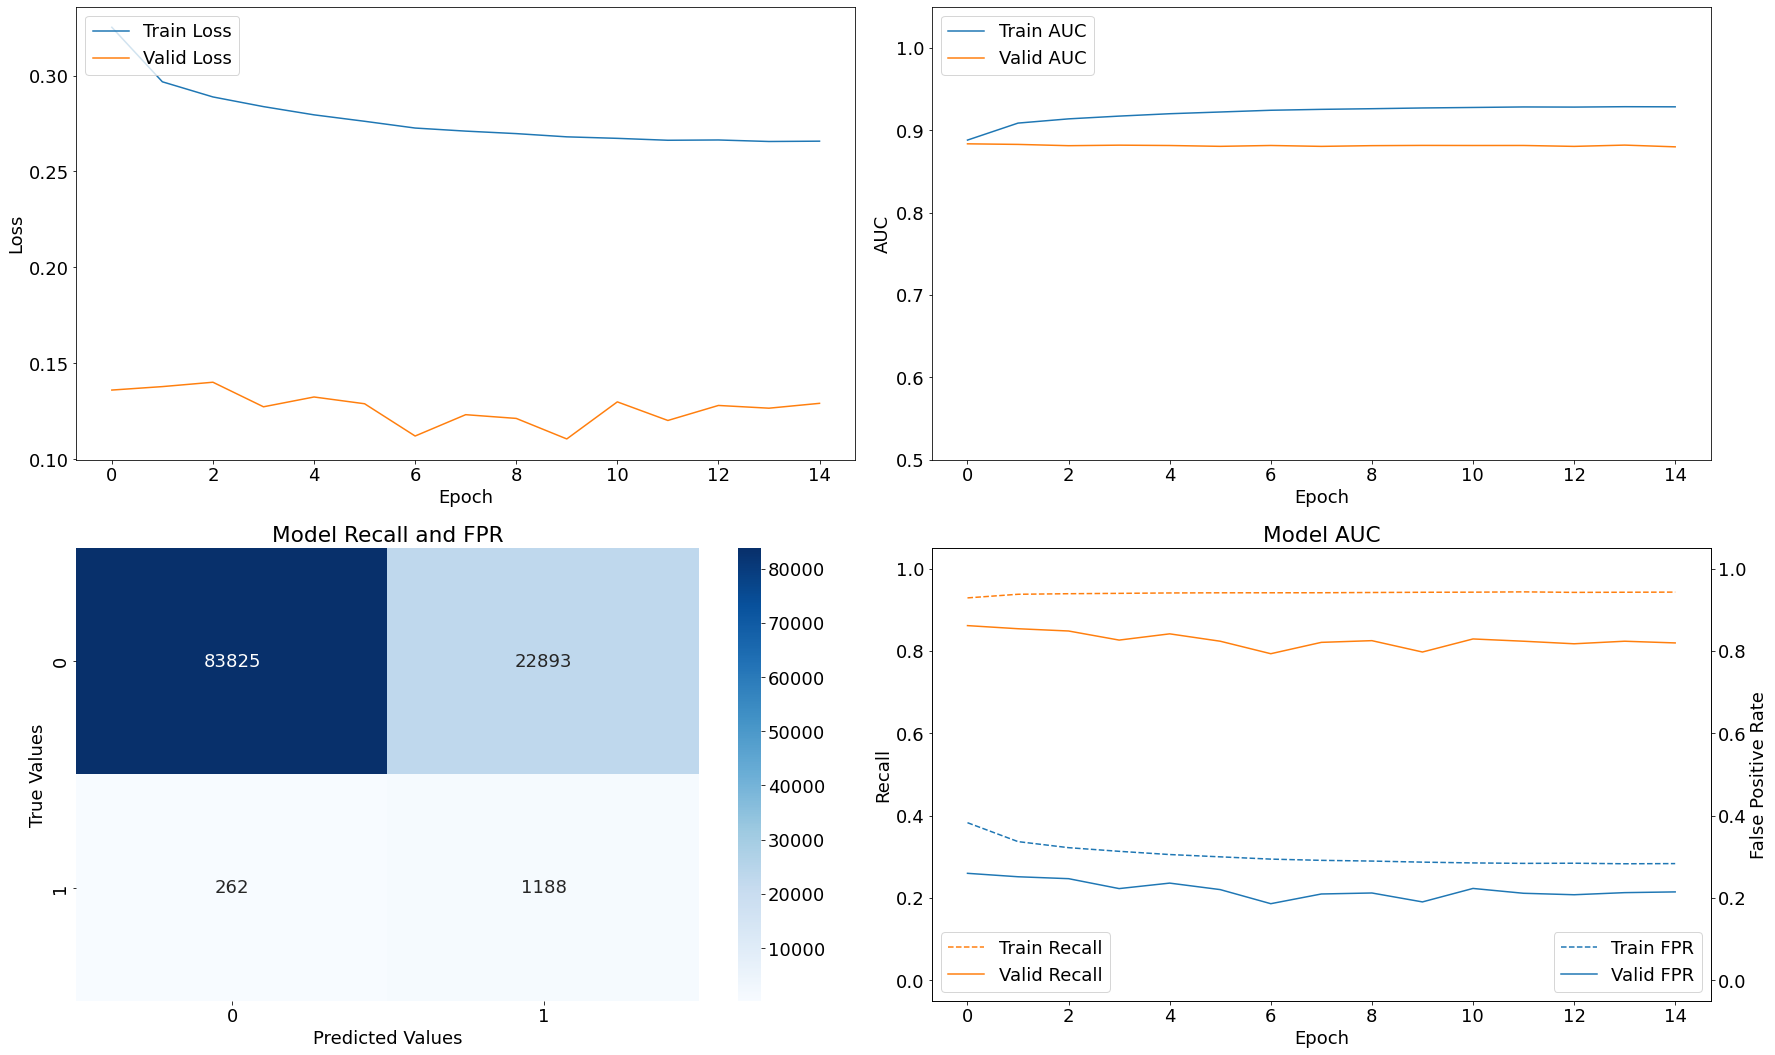

In [15]:
for t in thresholds:
    
    modelling_v4(X_train_v2_scaled_resampled,
                 y_train_v2_resampled,
                 X_val_v2_scaled,
                 y_val_v2,
                 'Variant II Model V4',
                 threshold=t)

---

### Fifth Model Iteration

In [26]:
def modelling_v5(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v5 = models.Sequential()

    model_v5.add(layers.Input(shape=(n_features, )))
    model_v5.add(layers.Dense(32, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(16, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(8, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(4, activation='relu'))
    model_v5.add(layers.Dense(2, activation='relu'))
    model_v5.add(layers.Dense(1, activation='sigmoid'))

    model_v5.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v5_history = model_v5.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v5,
             name,
             model_v5_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00006: early stopping
Results for Variant II Model V5 with threshold = 0.5.

 Train f1: 0.7051541515585471 
 Val f1: 0.12364555866851948 

 Train Recall: 0.7129312753677368 
 Val Recall: 0.7082758545875549 

 Train FPR: 0.07728137820959091 
 Val FPR: 0.1324518769979477


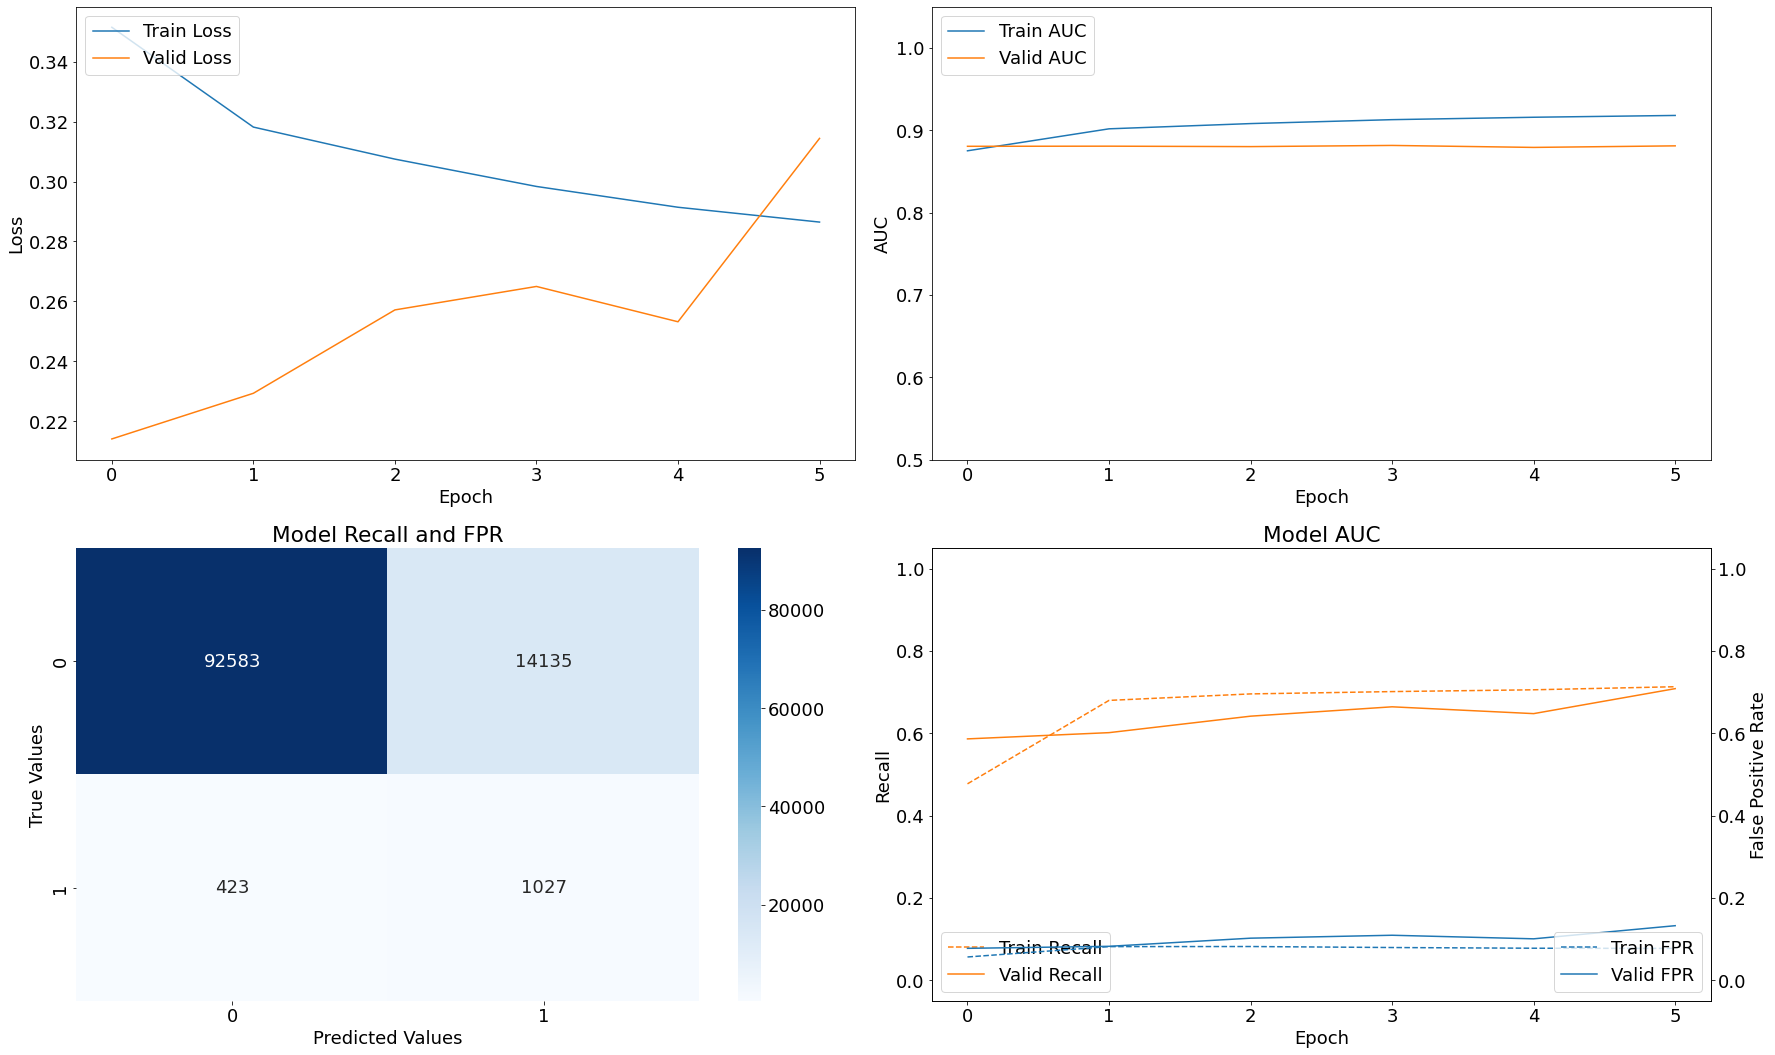

Epoch 00006: early stopping
Results for Variant II Model V5 with threshold = 0.4.

 Train f1: 0.6629560979070962 
 Val f1: 0.09813202855136258 

 Train Recall: 0.6233827471733093 
 Val Recall: 0.8006896376609802 

 Train FPR: 0.06430794298648834 
 Val FPR: 0.19725818932056427


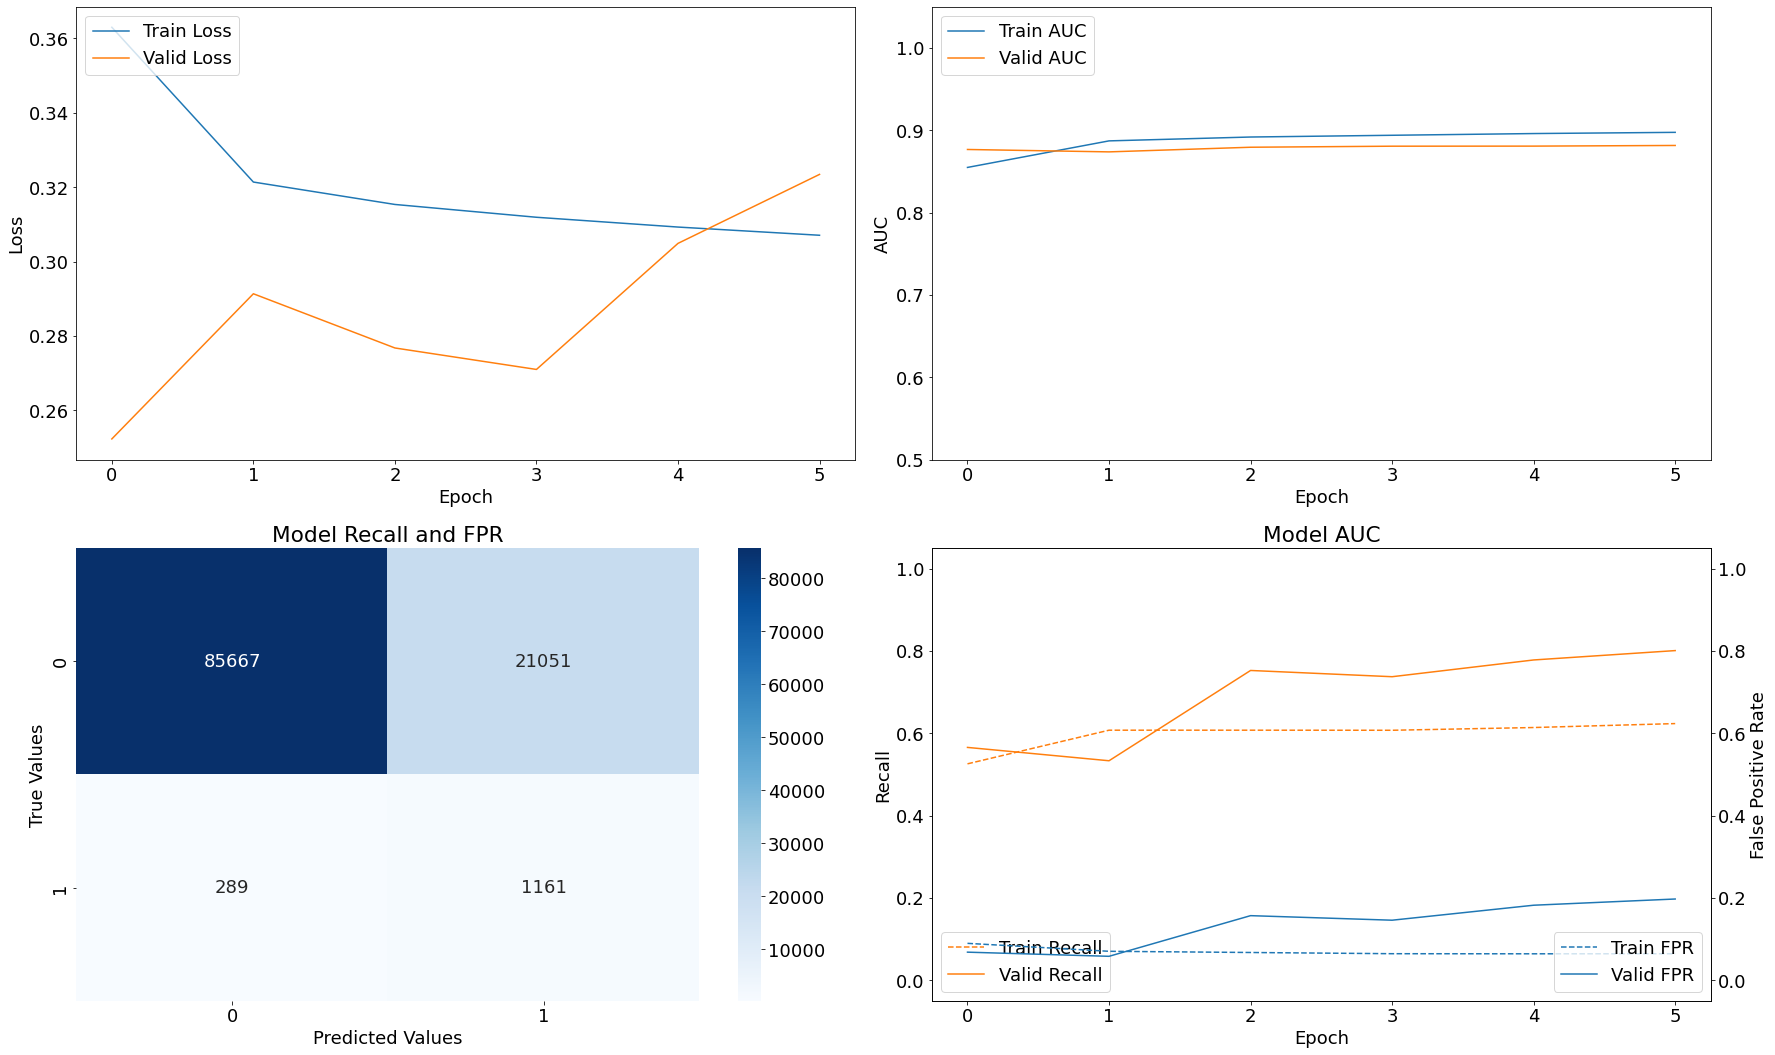

Epoch 00021: early stopping
Results for Variant II Model V5 with threshold = 0.3.

 Train f1: 0.6931335627769352 
 Val f1: 0.14654363849097424 

 Train Recall: 0.7834059596061707 
 Val Recall: 0.6462069153785706 

 Train FPR: 0.11926709115505219 
 Val FPR: 0.09746246784925461


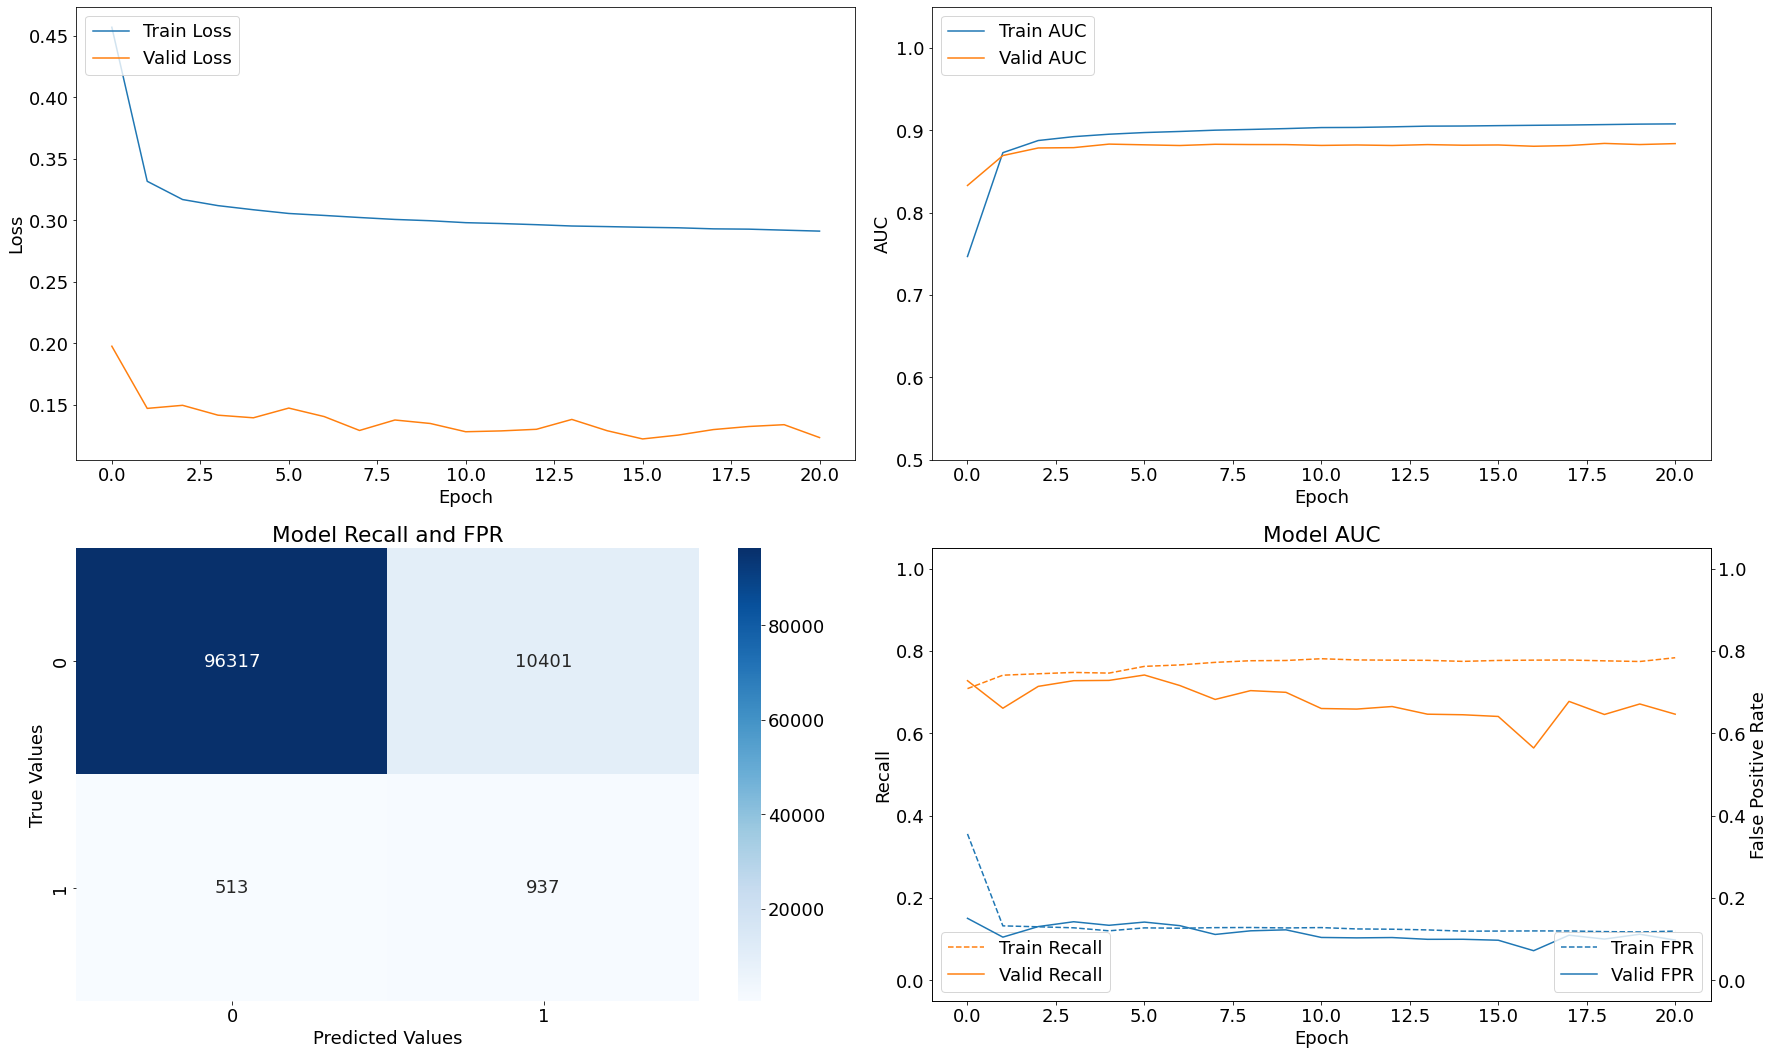

Epoch 00006: early stopping
Results for Variant II Model V5 with threshold = 0.2.

 Train f1: 0.667690792342464 
 Val f1: 0.09661558441118308 

 Train Recall: 0.8263882398605347 
 Val Recall: 0.813103437423706 

 Train FPR: 0.1622428447008133 
 Val FPR: 0.20406116545200348


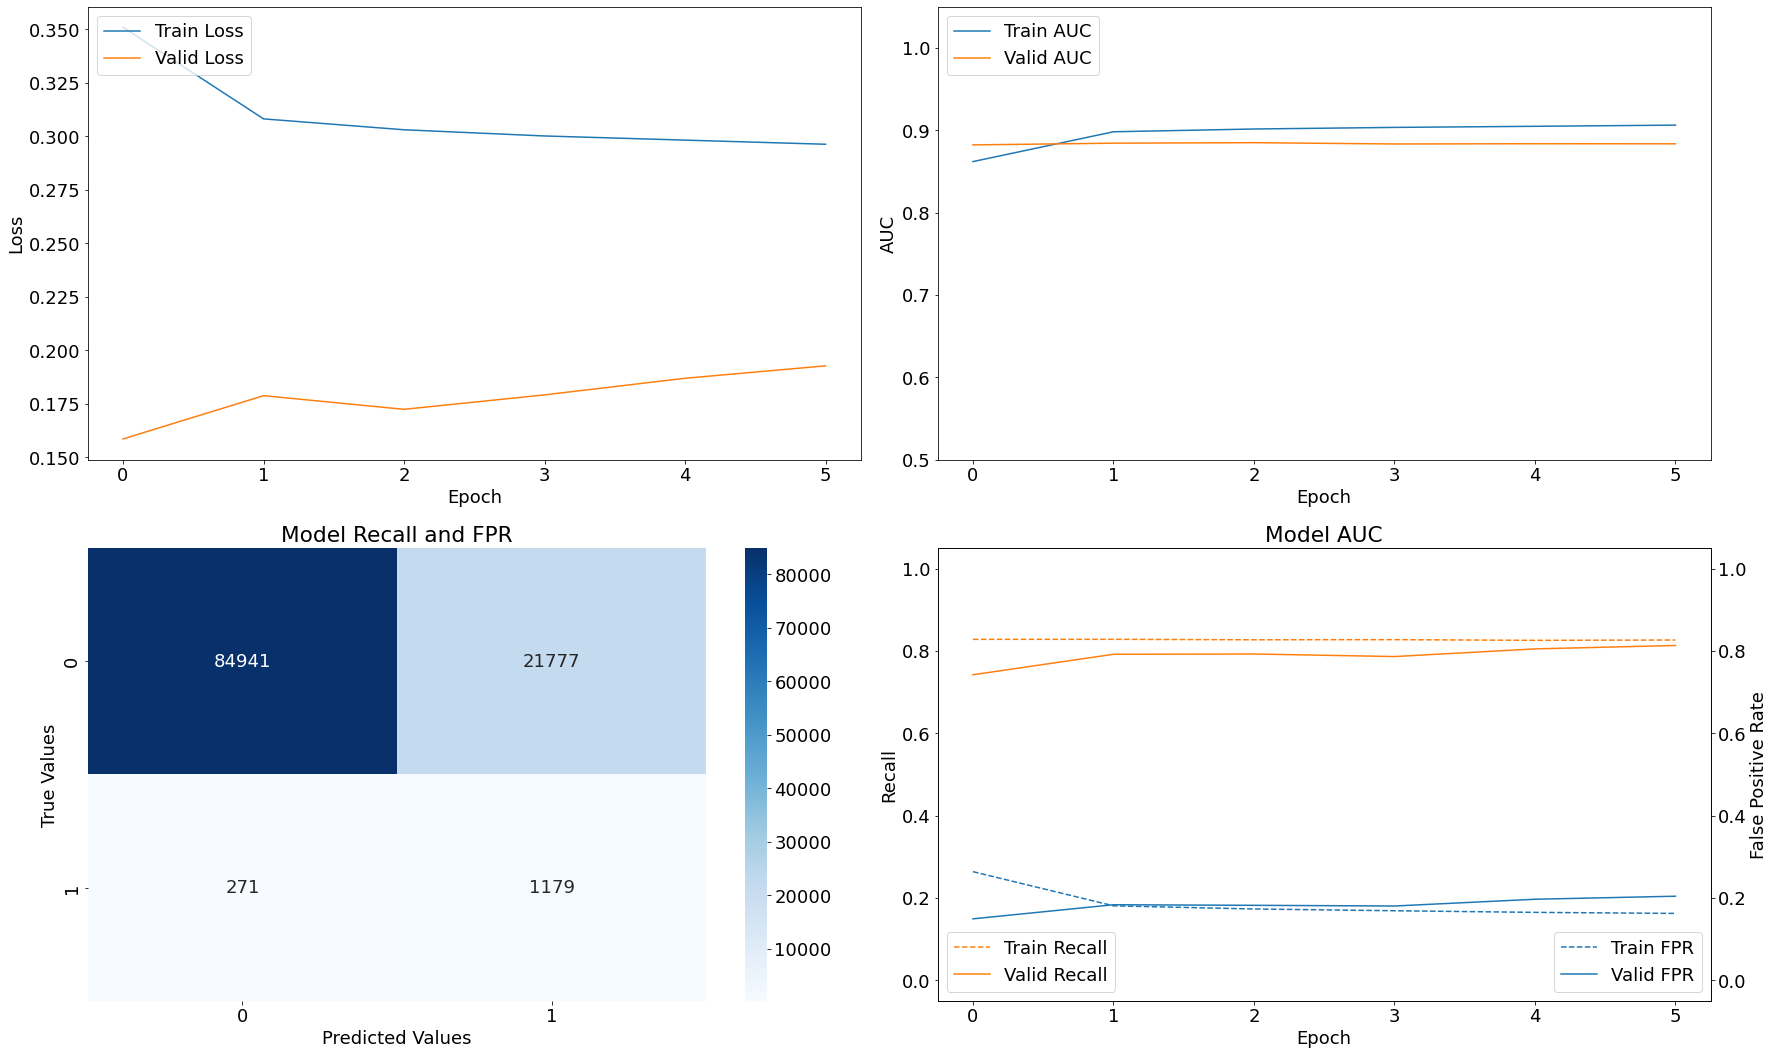

Epoch 00014: early stopping
Results for Variant II Model V5 with threshold = 0.1.

 Train f1: 0.6188059998623693 
 Val f1: 0.05616012796702562 

 Train Recall: 0.9284323453903198 
 Val Recall: 0.9413793087005615 

 Train FPR: 0.26807135343551636 
 Val FPR: 0.4291309714317322


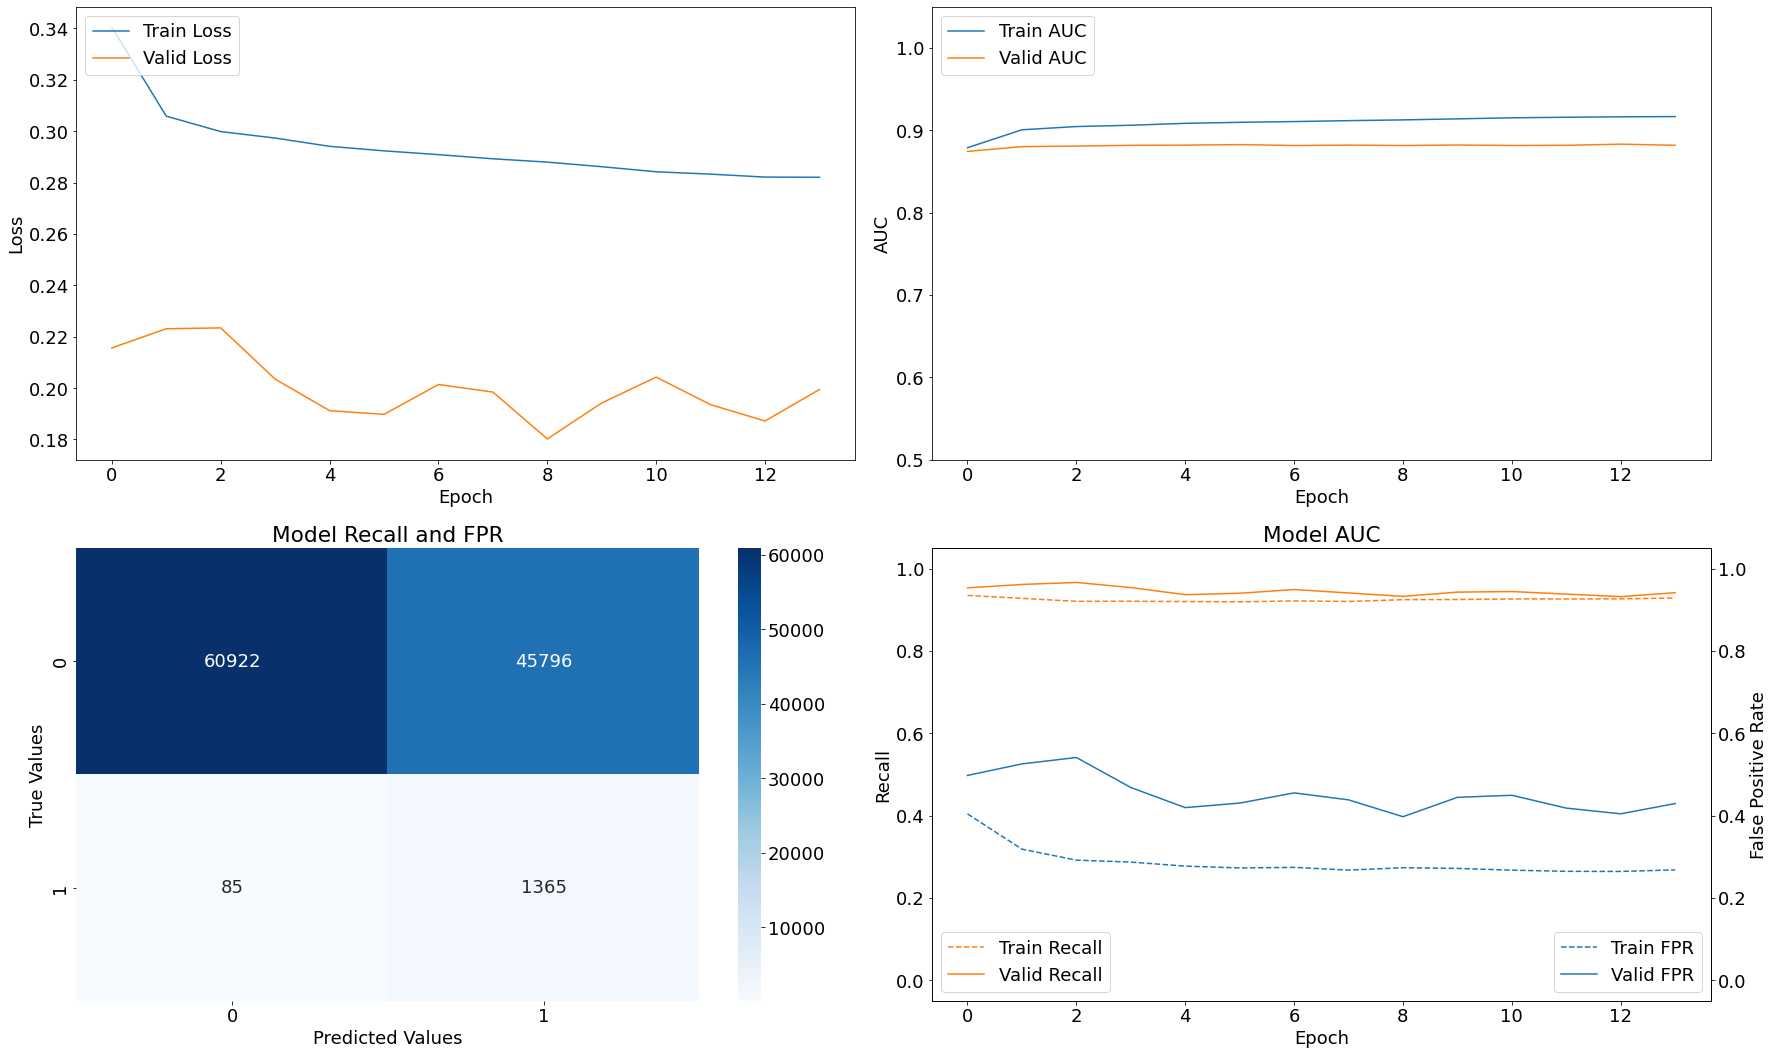

In [27]:
for t in thresholds:
    
    modelling_v5(X_train_v2_scaled_resampled,
                 y_train_v2_resampled,
                 X_val_v2_scaled,
                 y_val_v2,
                 'Variant II Model V5',
                 threshold=t)

---

### Sixth Model Iteration

In [18]:
def modelling_v6(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):     
    
    model_v6 = models.Sequential()

    model_v6.add(layers.Input(shape=(n_features, )))
    model_v6.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(1, activation='sigmoid'))

    model_v6.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v6_history = model_v6.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v6,
             name,
             model_v6_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00008: early stopping
Results for Variant II Model V6 with threshold = 0.5.

 Train f1: 0.6901538369161953 
 Val f1: 0.1561561575446046 

 Train Recall: 0.652888298034668 
 Val Recall: 0.6275861859321594 

 Train FPR: 0.05977969989180565 
 Val FPR: 0.08709871023893356


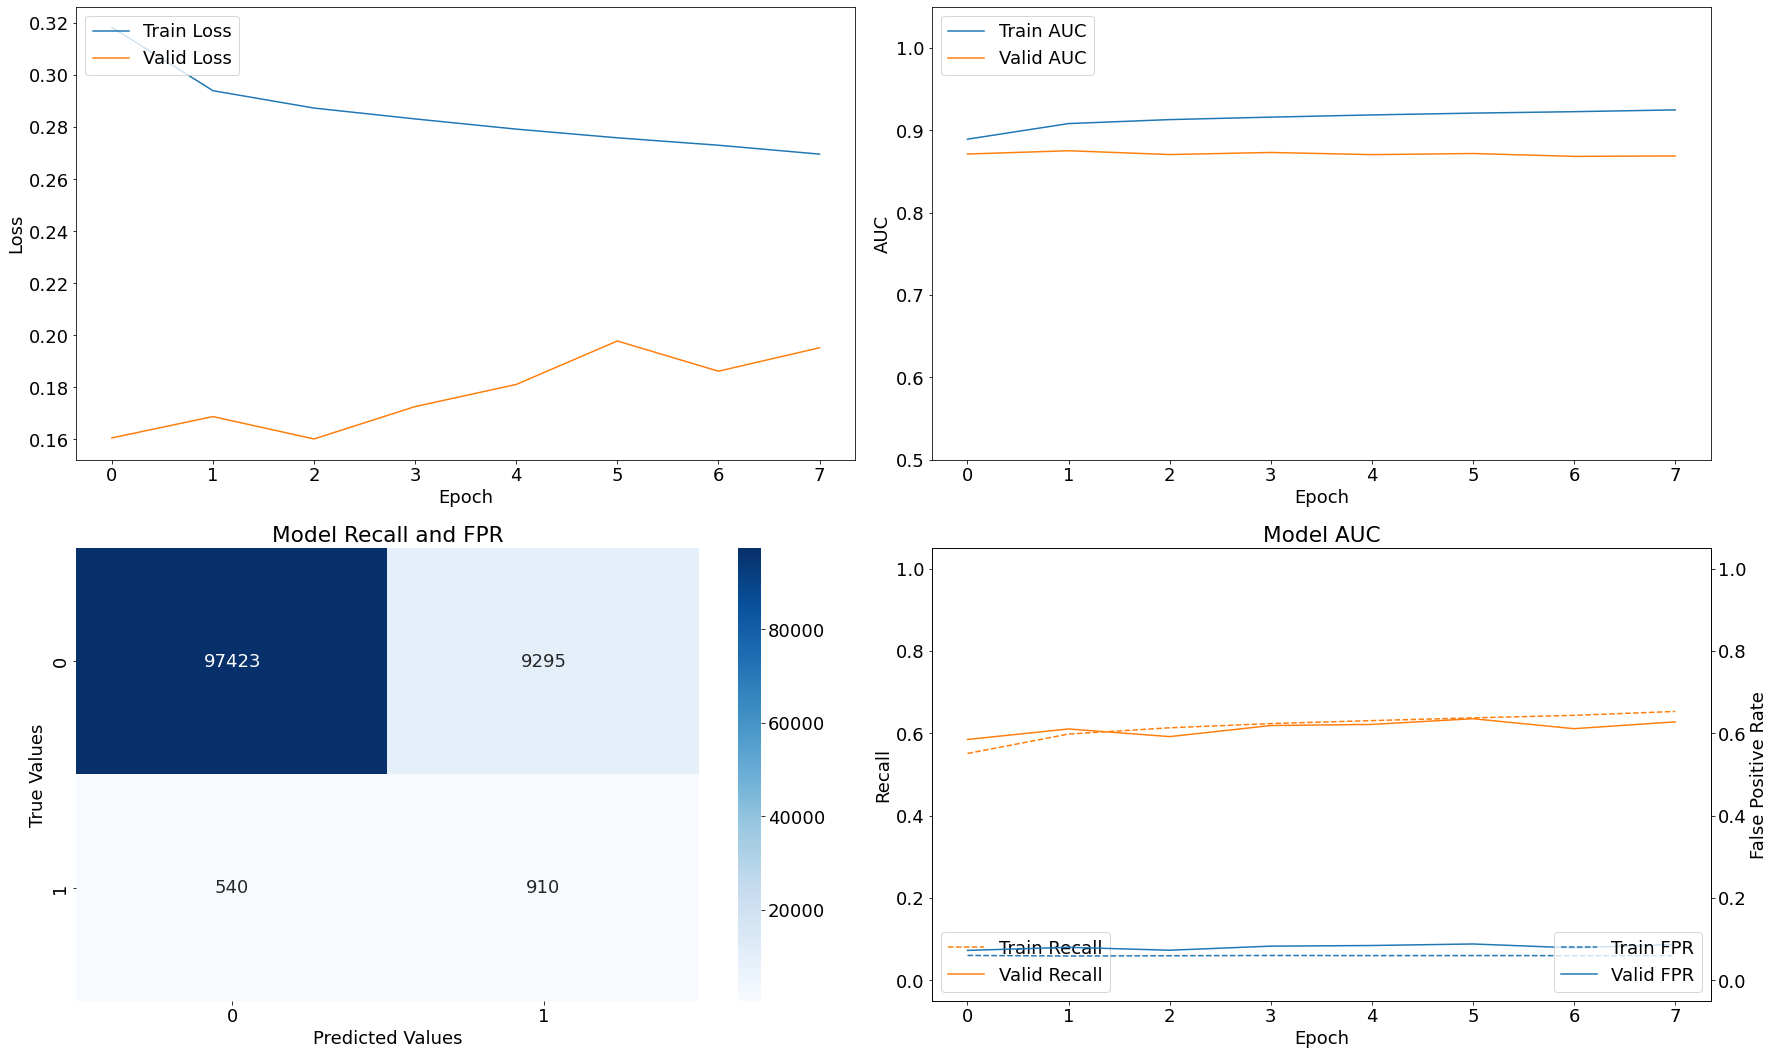

Epoch 00006: early stopping
Results for Variant II Model V6 with threshold = 0.4.

 Train f1: 0.6928756766878292 
 Val f1: 0.1663226196863411 

 Train Recall: 0.7024335265159607 
 Val Recall: 0.5834482908248901 

 Train FPR: 0.08128854632377625 
 Val FPR: 0.0738113522529602


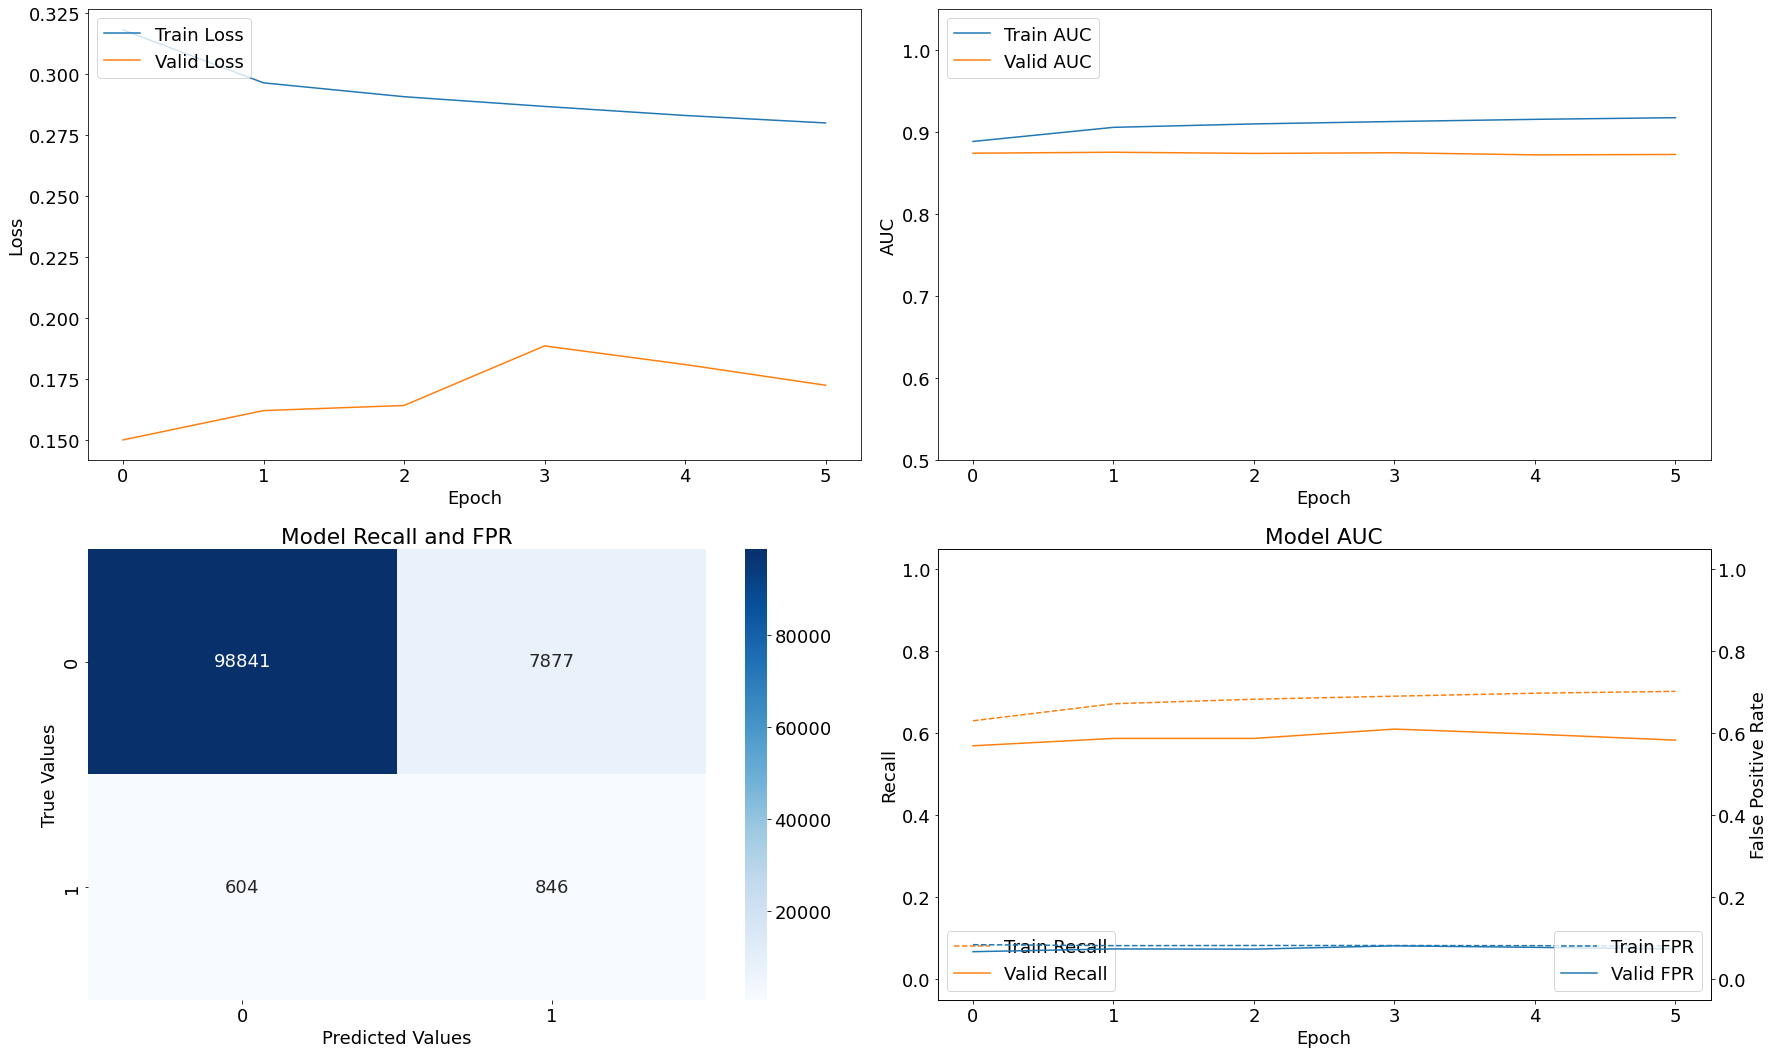

Epoch 00006: early stopping
Results for Variant II Model V6 with threshold = 0.3.

 Train f1: 0.6950872608552042 
 Val f1: 0.1413509803850353 

 Train Recall: 0.8049657344818115 
 Val Recall: 0.6703448295593262 

 Train FPR: 0.1277974247932434 
 Val FPR: 0.10617702454328537


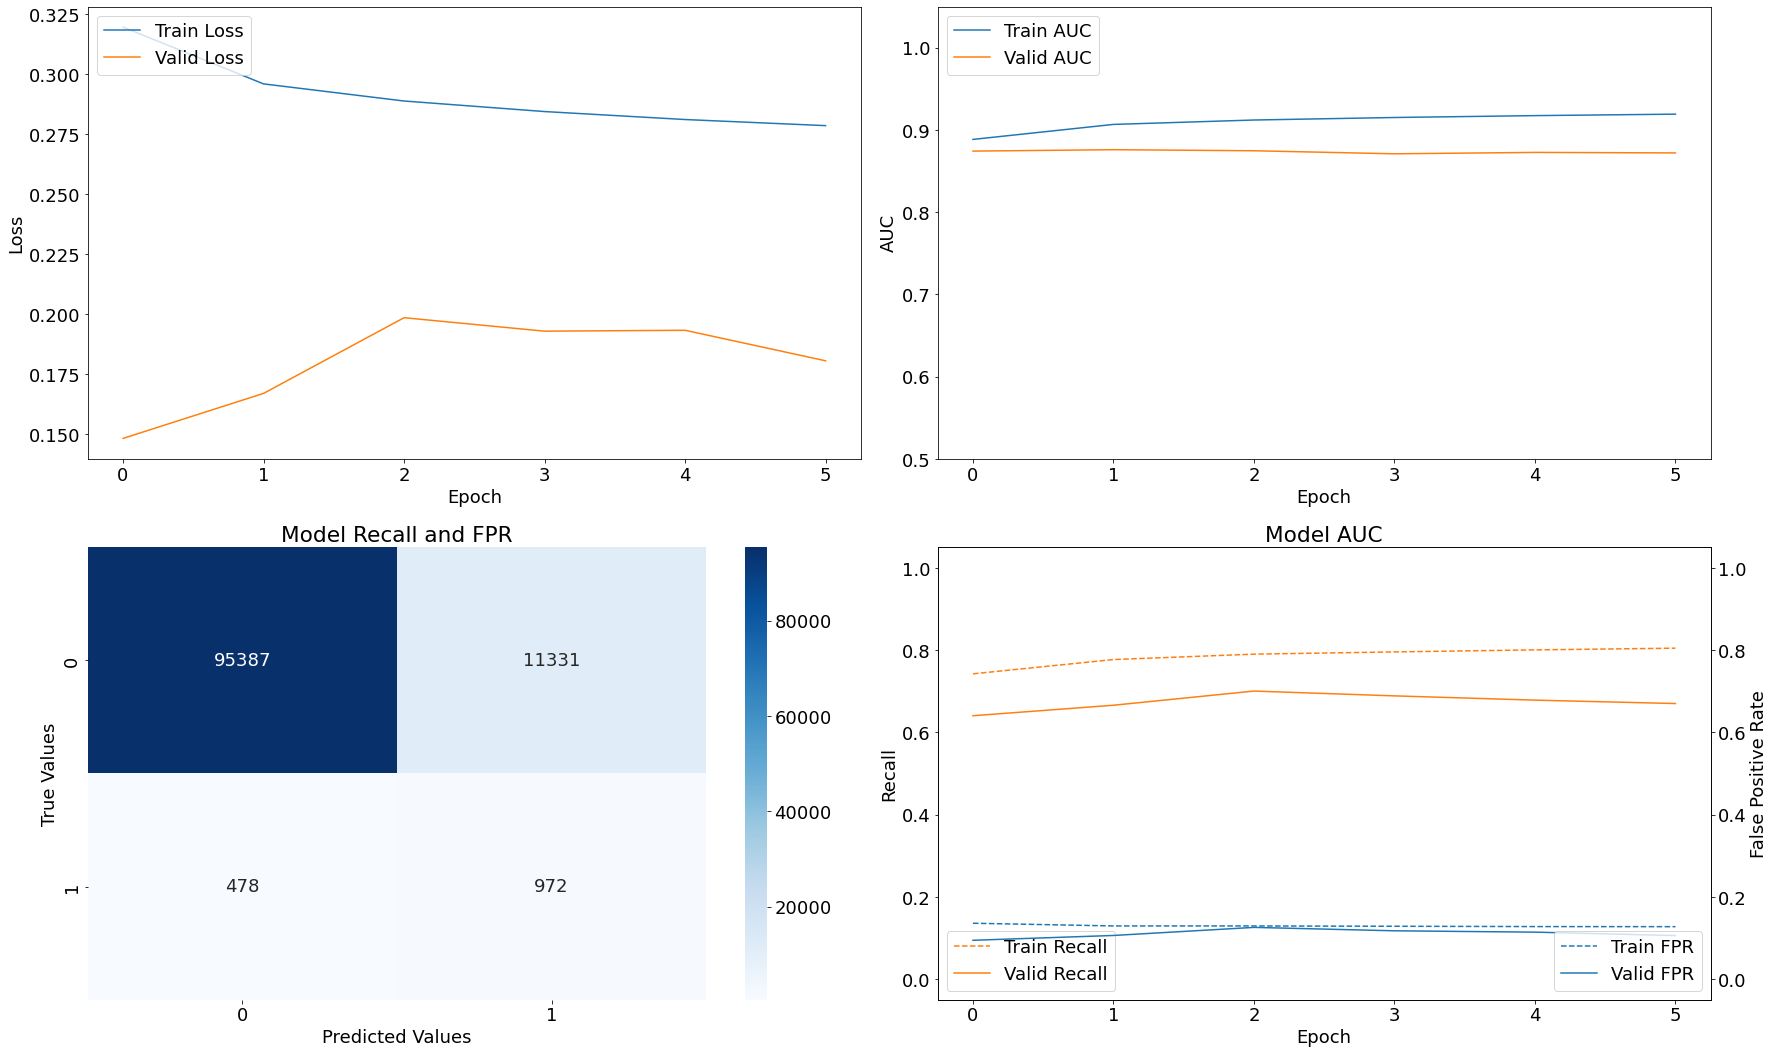

Epoch 00006: early stopping
Results for Variant II Model V6 with threshold = 0.2.

 Train f1: 0.6705505260183292 
 Val f1: 0.13760160079756997 

 Train Recall: 0.8744744658470154 
 Val Recall: 0.665517270565033 

 Train FPR: 0.183437779545784 
 Val FPR: 0.10880076140165329


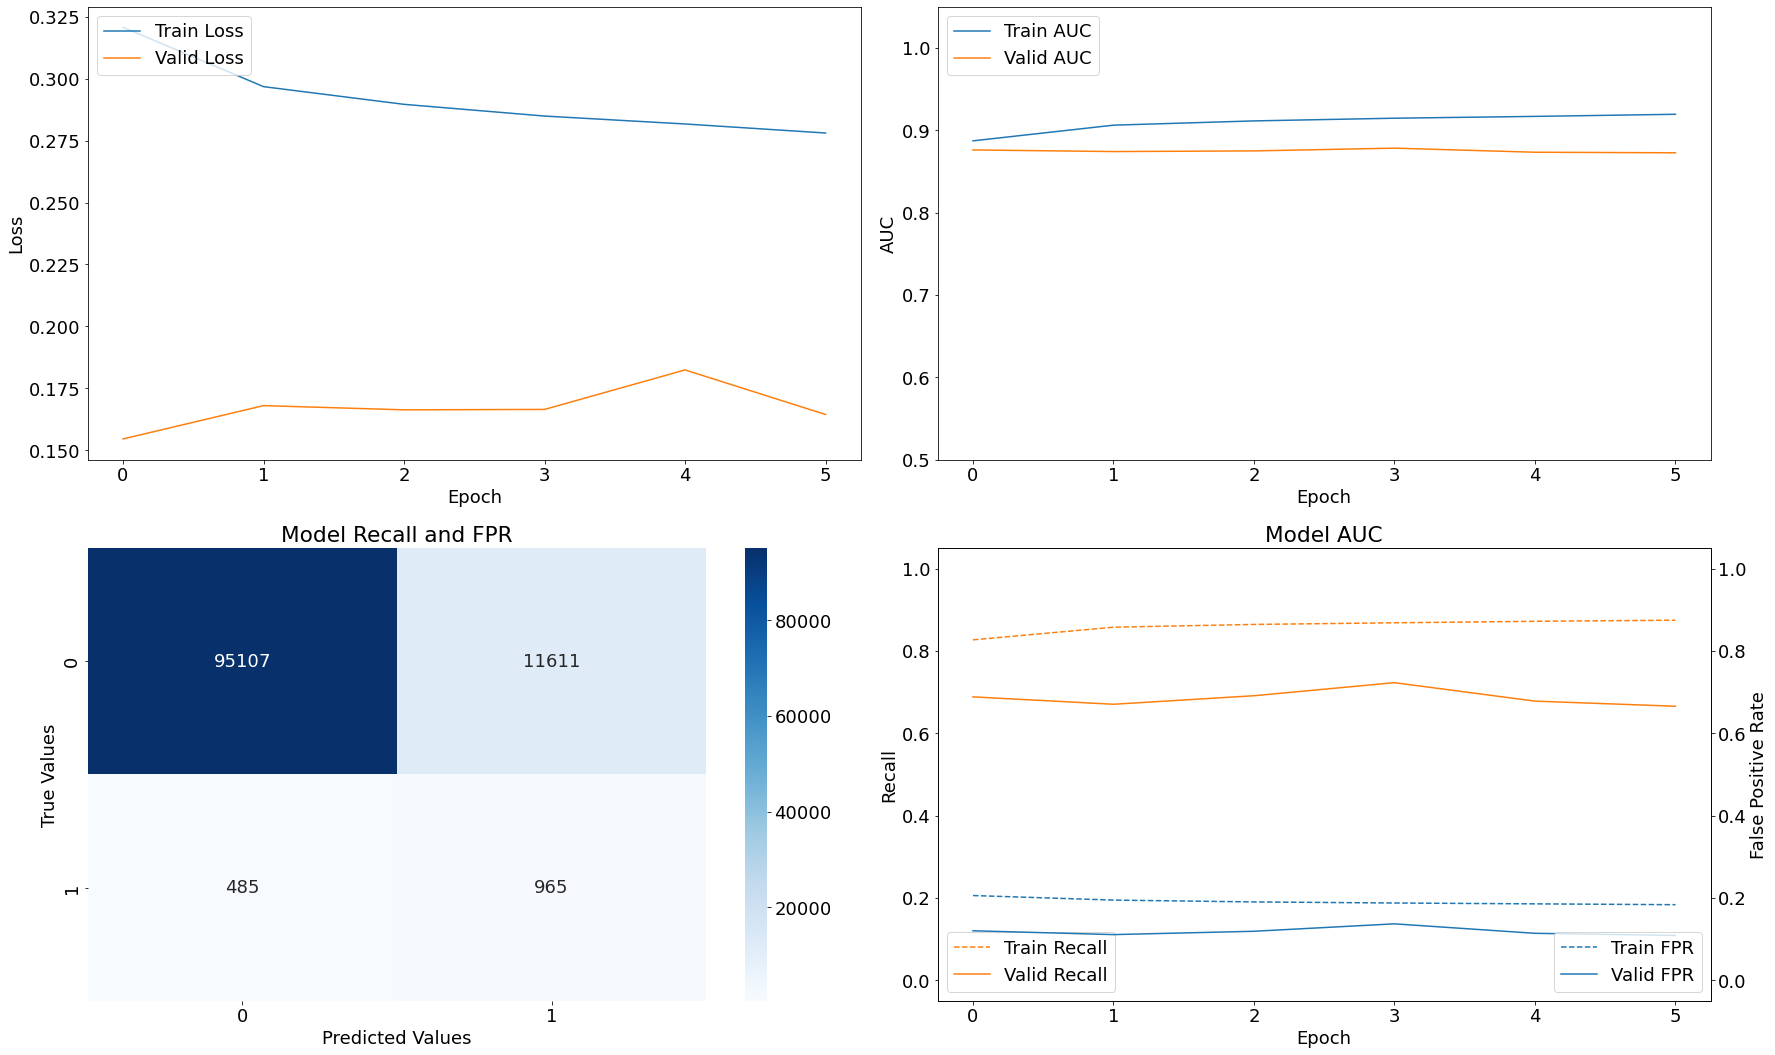

Epoch 00010: early stopping
Results for Variant II Model V6 with threshold = 0.1.

 Train f1: 0.6203261593825317 
 Val f1: 0.11203048896205271 

 Train Recall: 0.9390368461608887 
 Val Recall: 0.7703448534011841 

 Train FPR: 0.2721293568611145 
 Val FPR: 0.16280290484428406


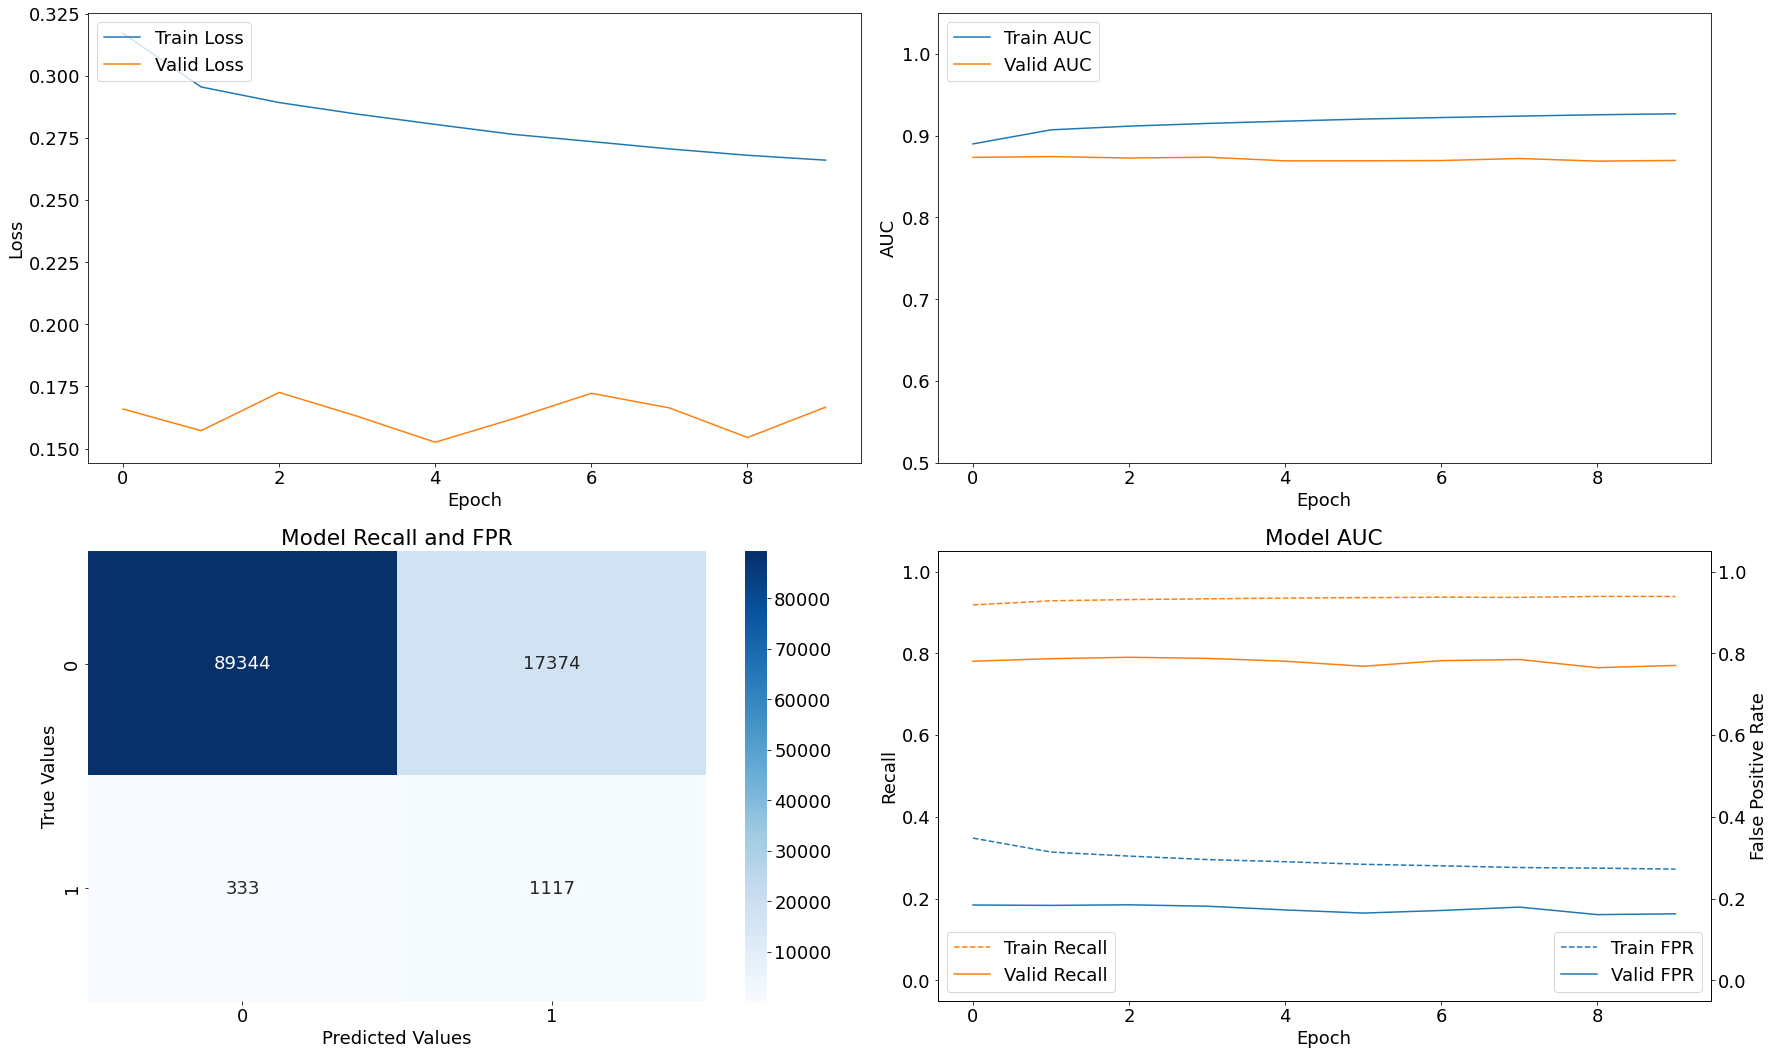

In [19]:
for t in thresholds:
    
    modelling_v6(X_train_v2_scaled_resampled,
                 y_train_v2_resampled,
                 X_val_v2_scaled,
                 y_val_v2,
                 'Variant II Model V6',
                 threshold=t)

---

### Seventh Model Iteration

In [20]:
def modelling_v7(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5): 

    model_v7 = models.Sequential()

    model_v7.add(layers.Input(shape=(n_features, )))
    model_v7.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(1, activation='sigmoid'))

    model_v7.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v7_history = model_v7.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v7,
             name,
             model_v7_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00007: early stopping
Results for Variant II Model V7 with threshold = 0.5.

 Train f1: 0.5212153523791215 
 Val f1: 0.1776308546678737 

 Train Recall: 0.4220803380012512 
 Val Recall: 0.5558620691299438 

 Train FPR: 0.0493798591196537 
 Val FPR: 0.06389737129211426


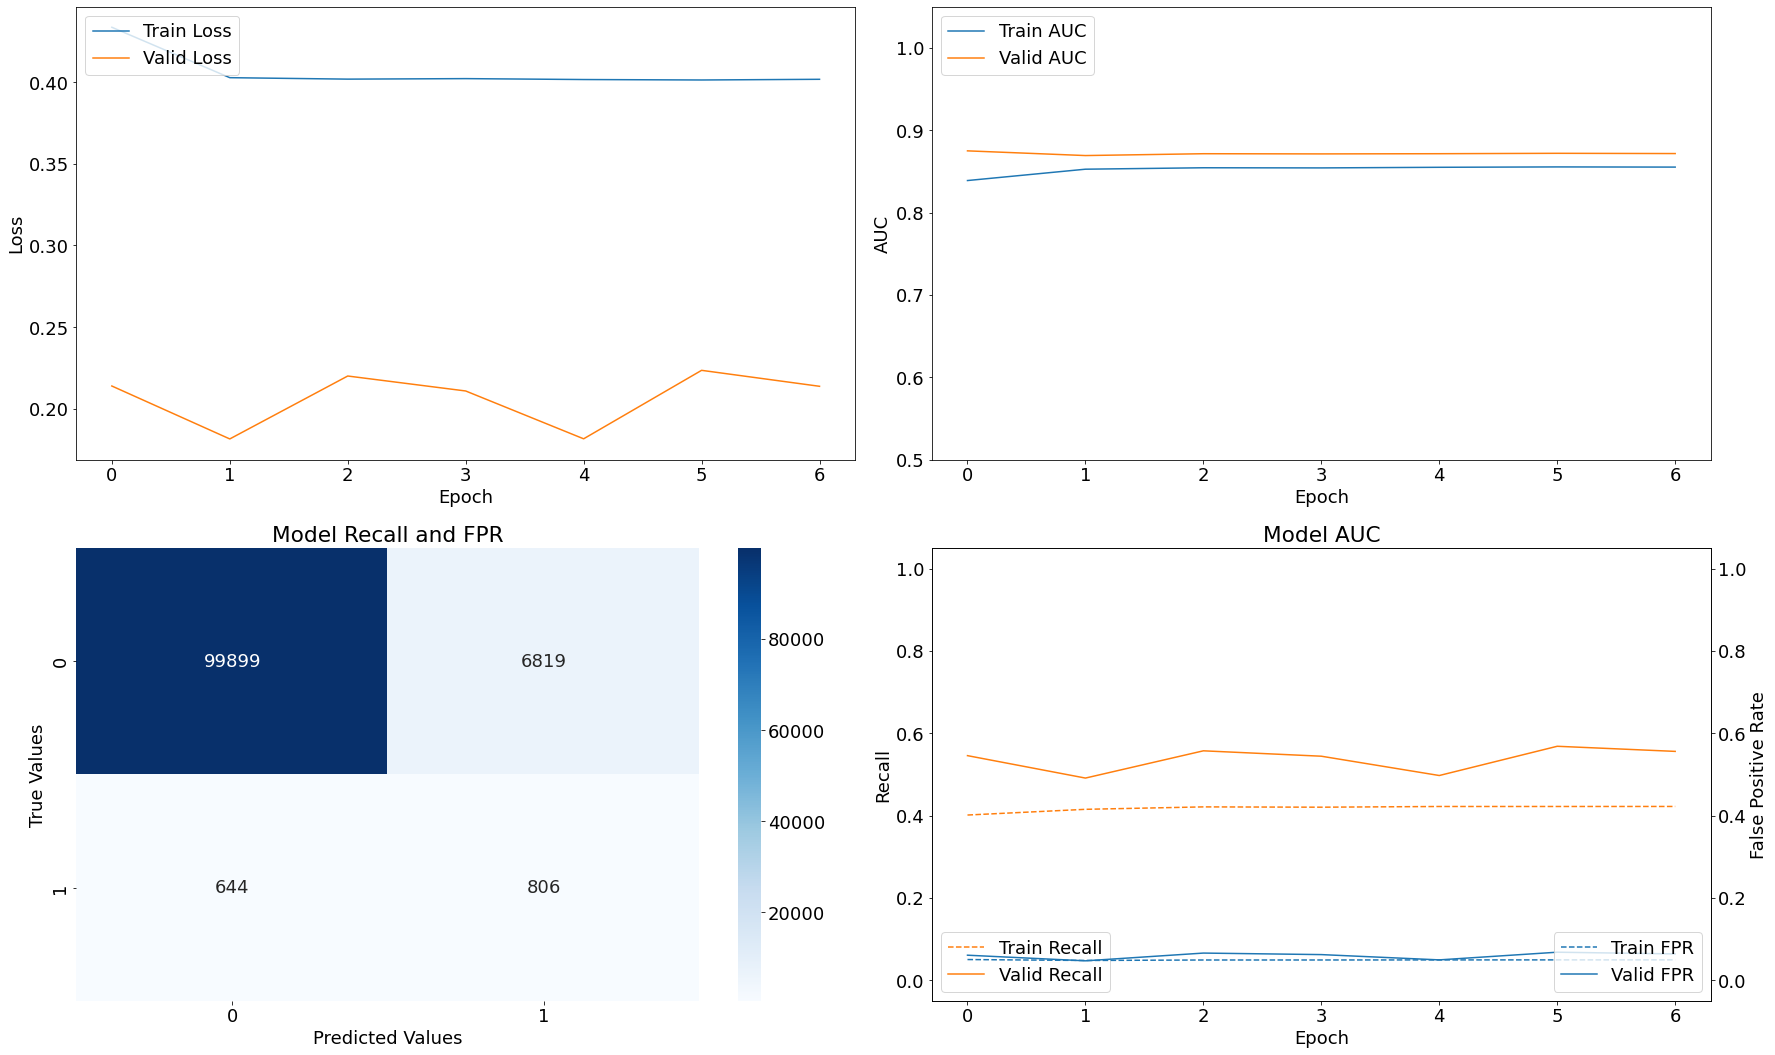

Epoch 00008: early stopping
Results for Variant II Model V7 with threshold = 0.4.

 Train f1: 0.5760197151174472 
 Val f1: 0.15378043180337425 

 Train Recall: 0.5360354781150818 
 Val Recall: 0.6206896305084229 

 Train FPR: 0.08128346502780914 
 Val FPR: 0.08766093850135803


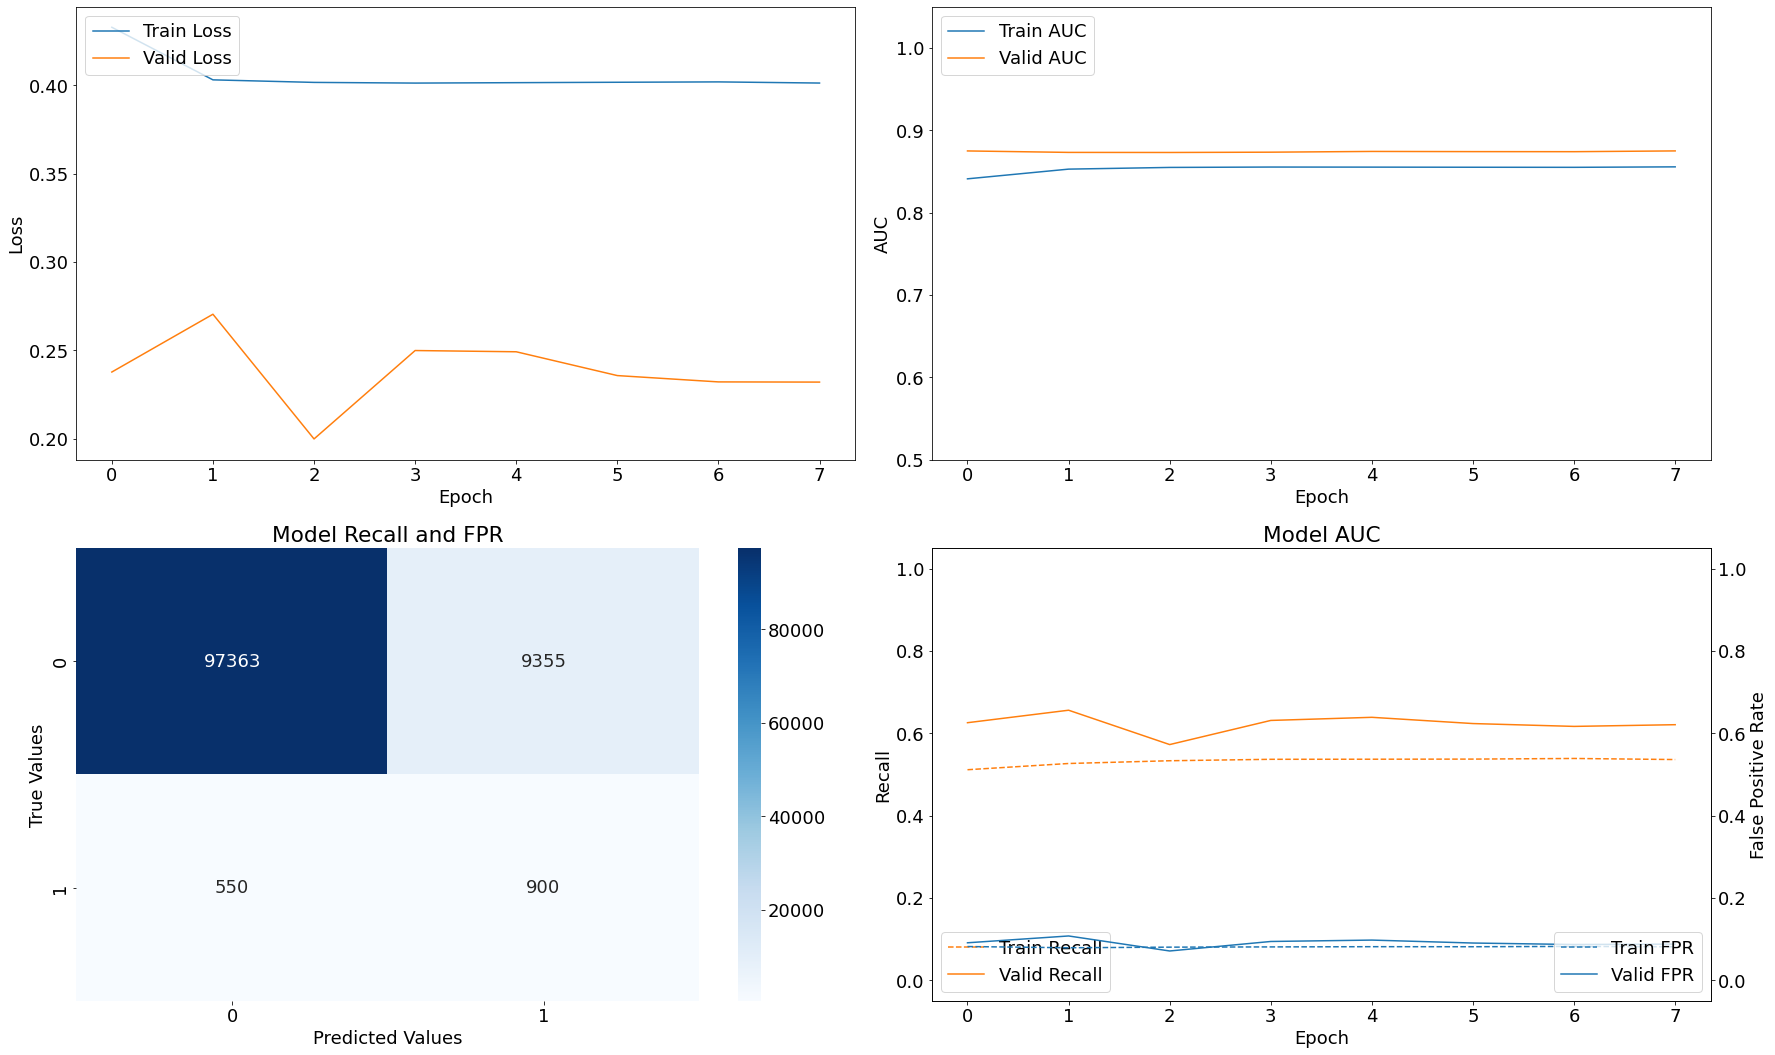

Epoch 00013: early stopping
Results for Variant II Model V7 with threshold = 0.3.

 Train f1: 0.6000538841288254 
 Val f1: 0.11963633761617203 

 Train Recall: 0.6681494116783142 
 Val Recall: 0.7124137878417969 

 Train FPR: 0.13970328867435455 
 Val FPR: 0.13855206966400146


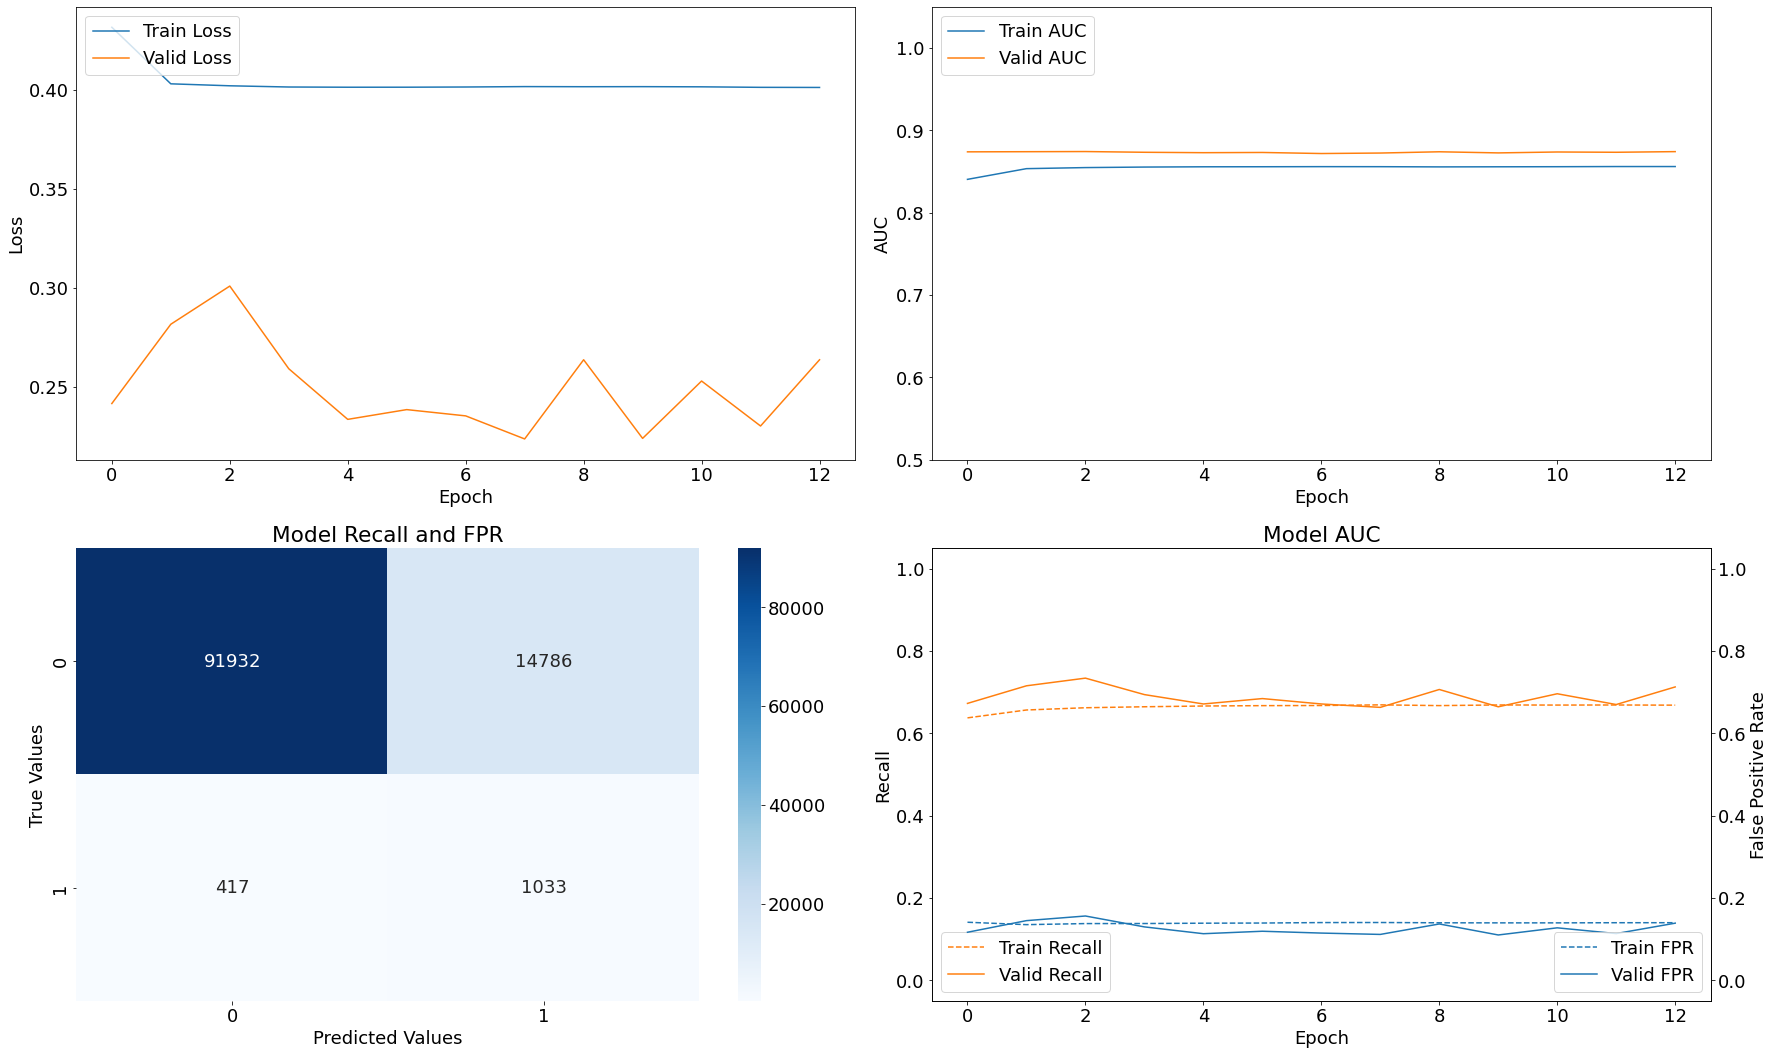

Epoch 00006: early stopping
Results for Variant II Model V7 with threshold = 0.2.

 Train f1: 0.5796154786673885 
 Val f1: 0.12261270697221748 

 Train Recall: 0.7879507541656494 
 Val Recall: 0.7062069177627563 

 Train FPR: 0.2327299416065216 
 Val FPR: 0.13333271443843842


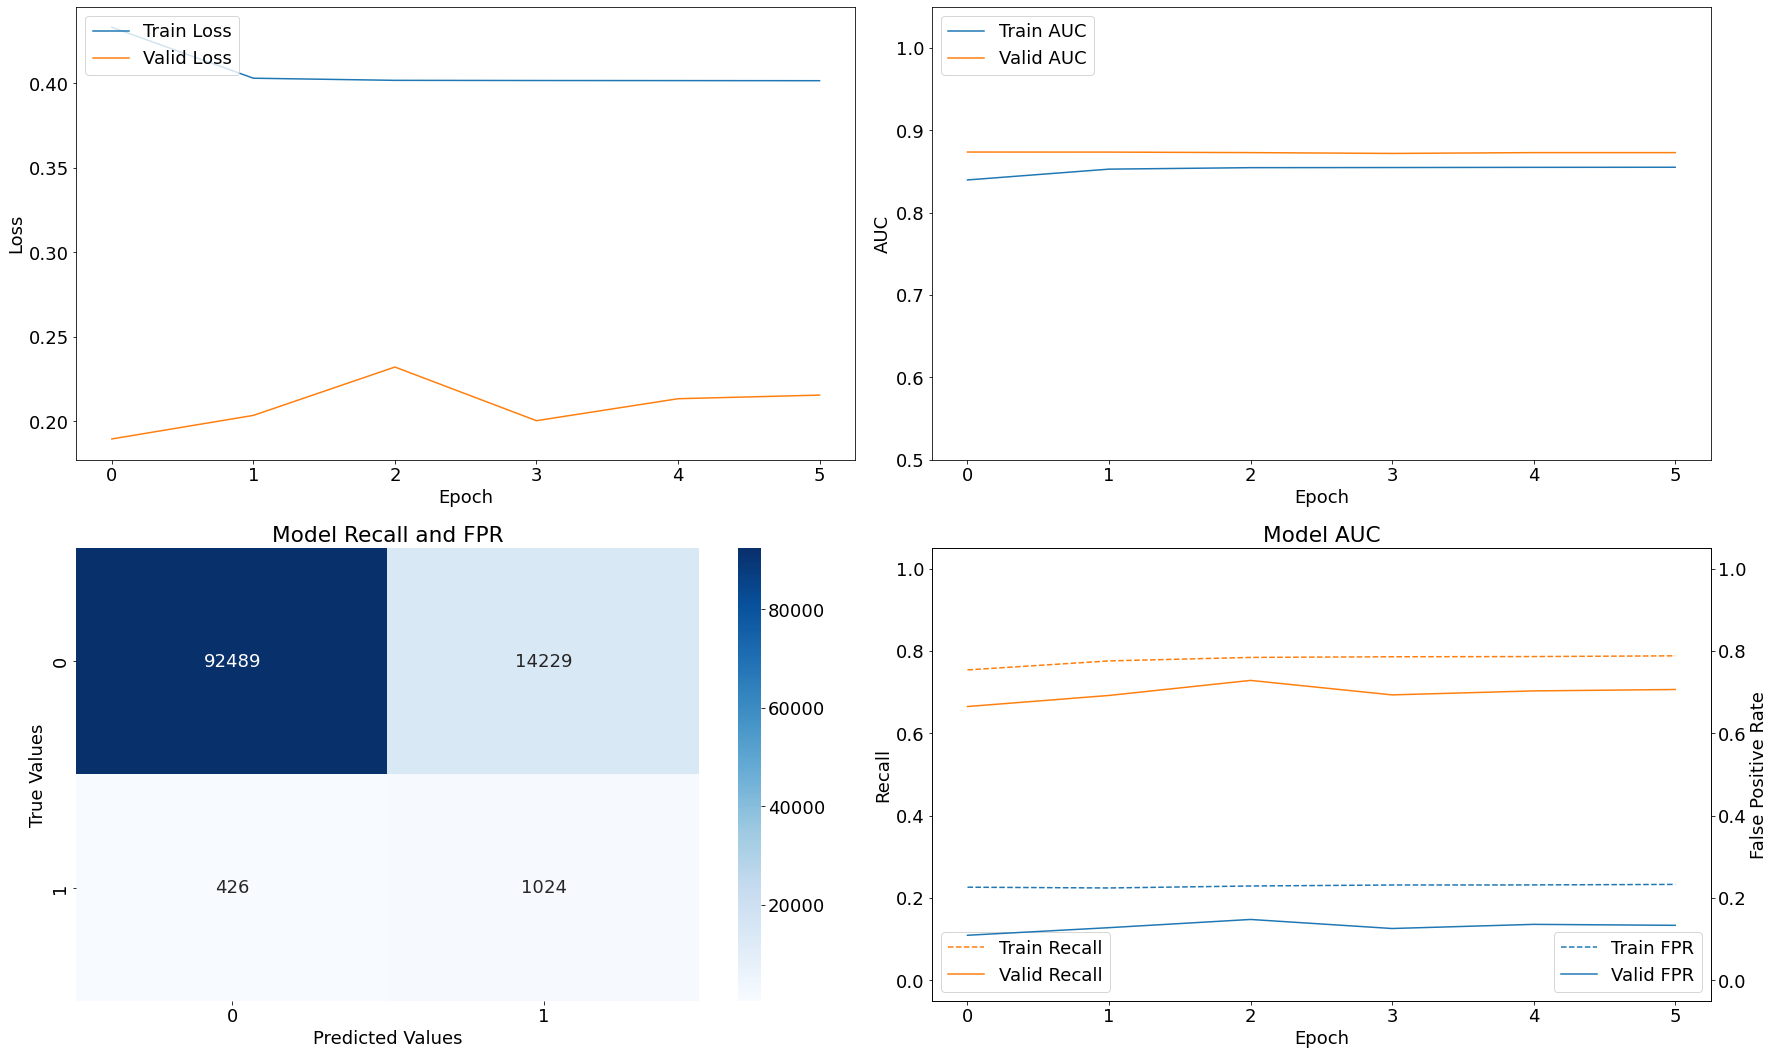

Epoch 00006: early stopping
Results for Variant II Model V7 with threshold = 0.1.

 Train f1: 0.5016525345884051 
 Val f1: 0.09602426133998733 

 Train Recall: 0.9078028798103333 
 Val Recall: 0.7862069010734558 

 Train FPR: 0.4278600811958313 
 Val FPR: 0.19822335243225098


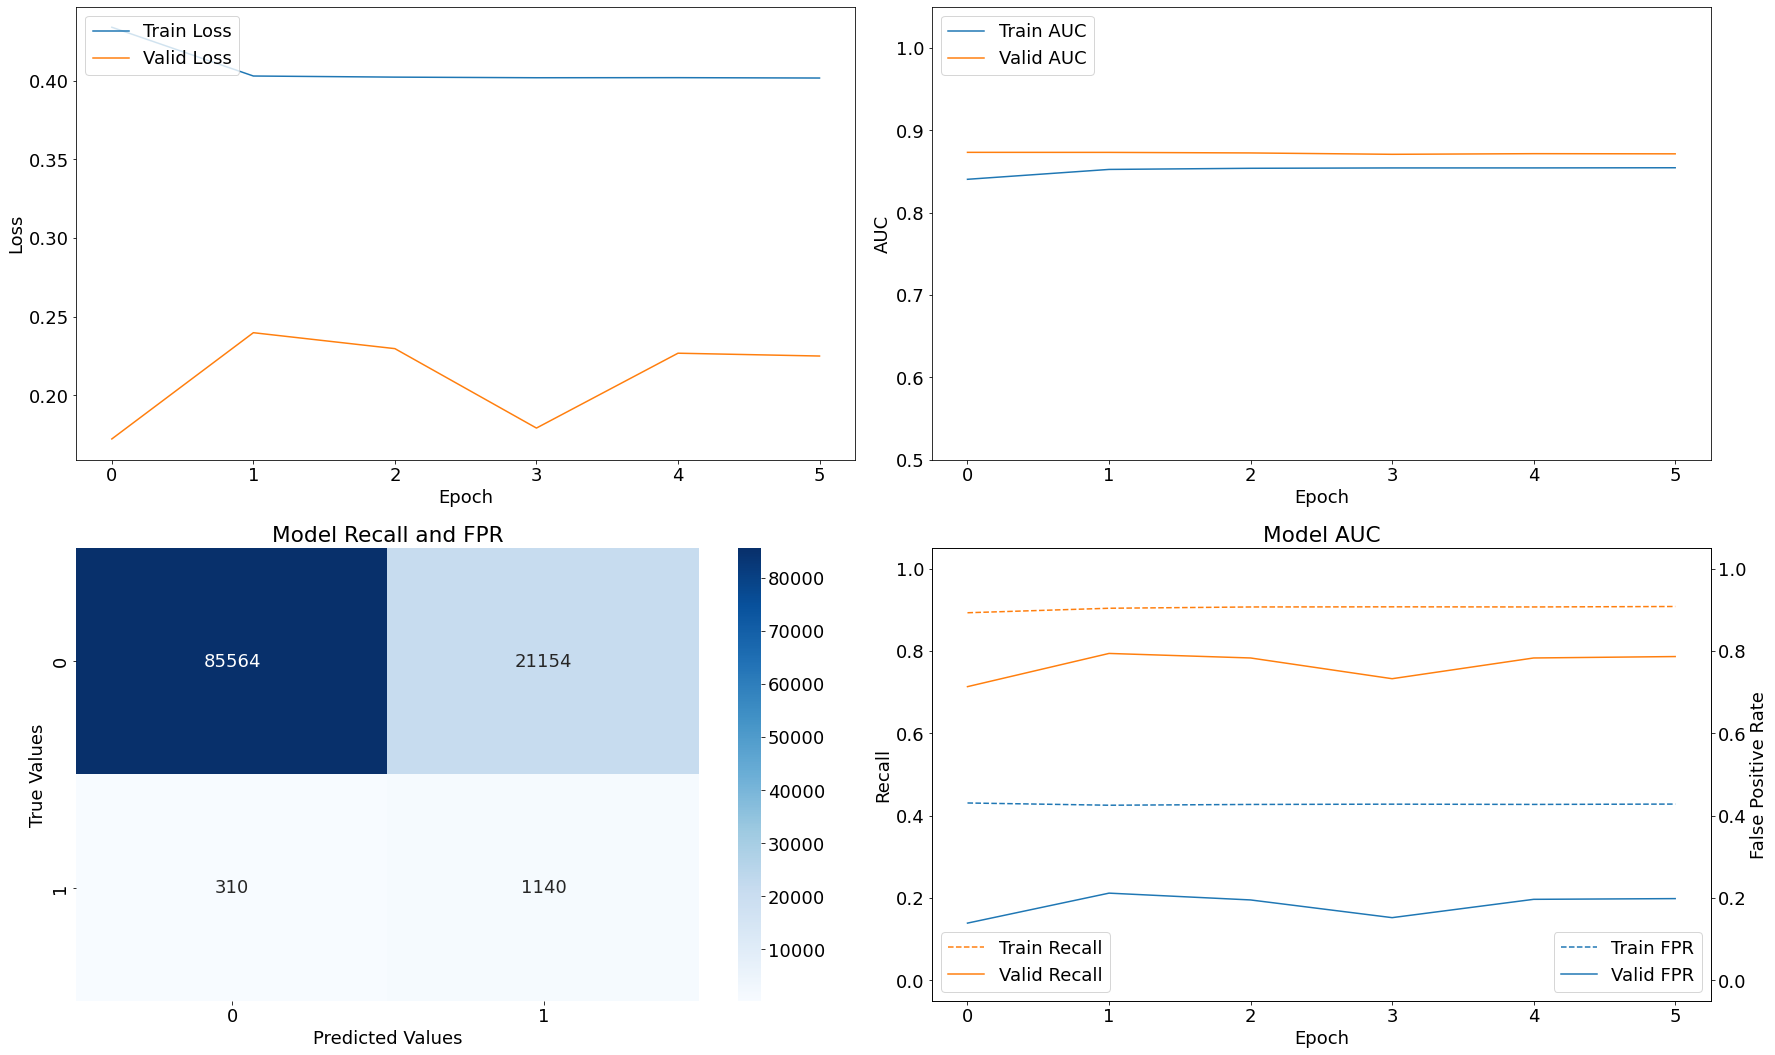

In [21]:
for t in thresholds:
    
    modelling_v7(X_train_v2_scaled_resampled,
                 y_train_v2_resampled,
                 X_val_v2_scaled,
                 y_val_v2,
                 'Variant II Model V7',
                 threshold=t)

---

### Eighth Model Iteration

In [22]:
def modelling_v8(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):   
    
    model_v8 = models.Sequential()

    model_v8.add(layers.Input(shape=(n_features, )))
    model_v8.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.Dense(1, activation='sigmoid'))

    model_v8.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v8_history = model_v8.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    verbose=0).history
    
    evaluate(model_v8,
             name,
             model_v8_history,
             X_val,
             y_val,
             threshold=threshold)

Results for Variant II Model V8 with threshold = 0.5.

 Train f1: 0.5064422054722936 
 Val f1: 0.16548646326891298 

 Train Recall: 0.41472938656806946 
 Val Recall: 0.5882758498191833 

 Train FPR: 0.05577125772833824 
 Val FPR: 0.07502014935016632


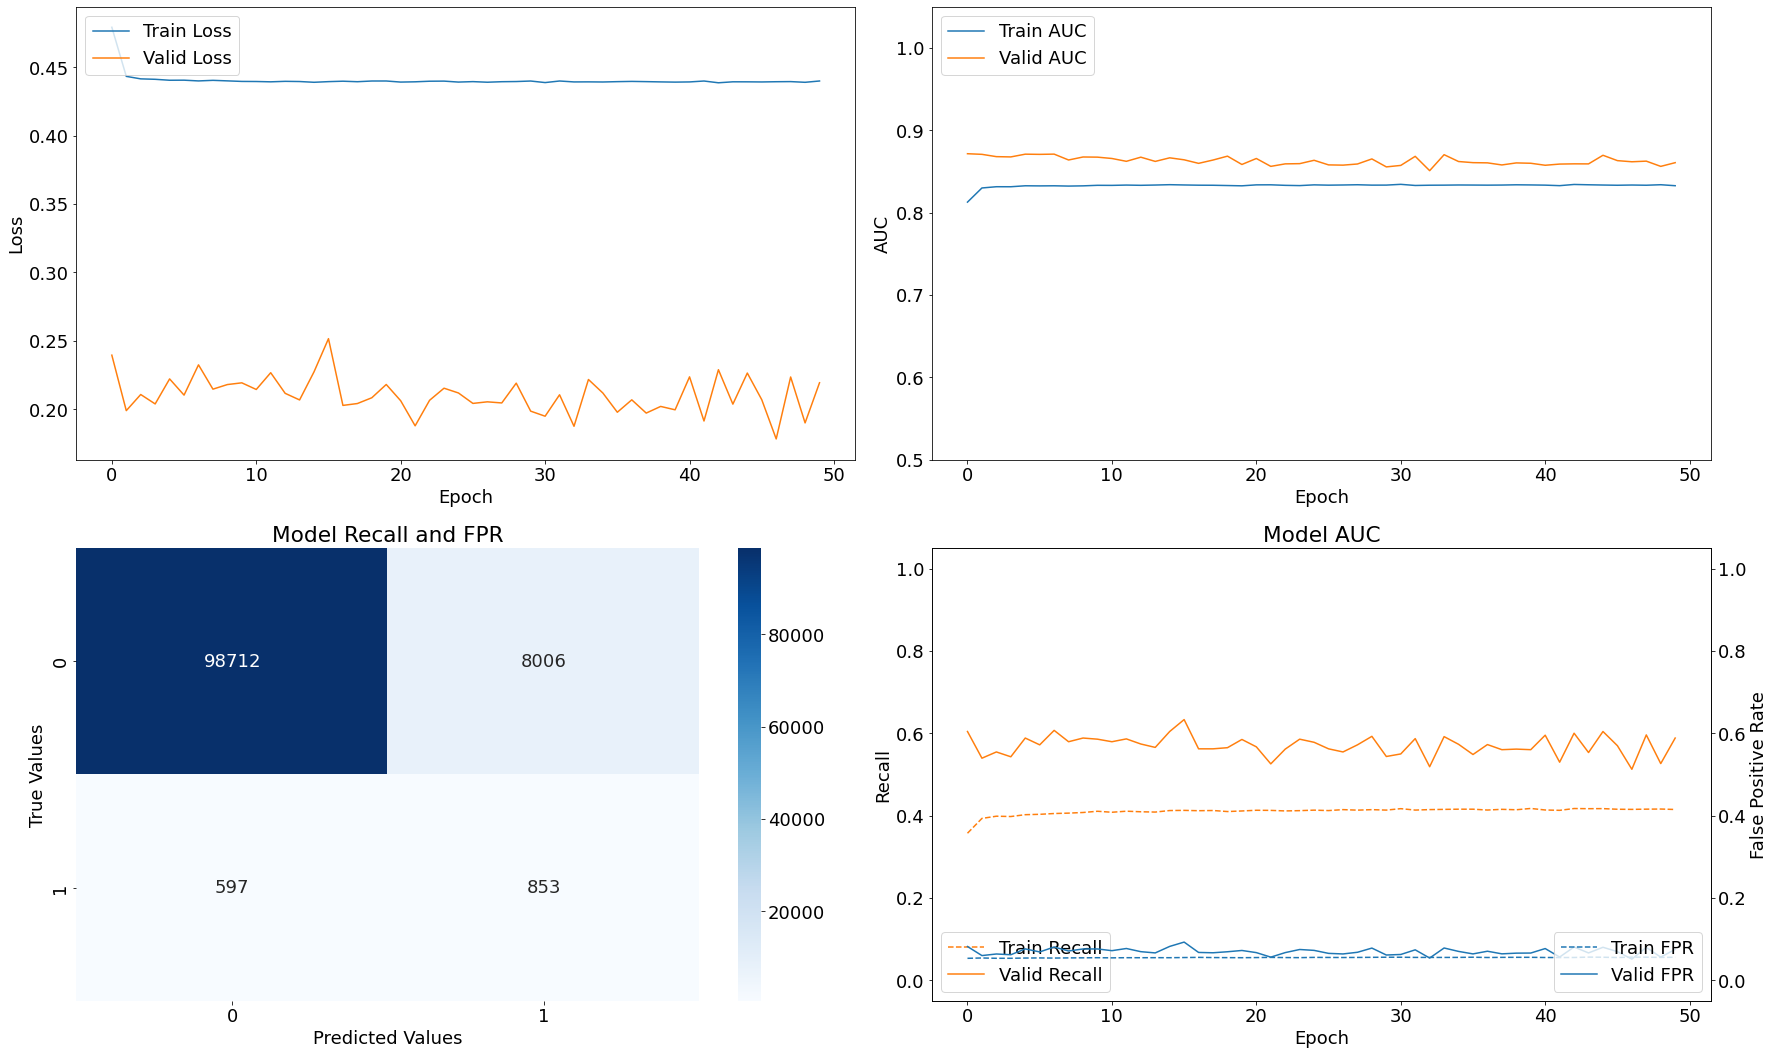

Results for Variant II Model V8 with threshold = 0.4.

 Train f1: 0.5614602569812251 
 Val f1: 0.17165455692896464 

 Train Recall: 0.5347899794578552 
 Val Recall: 0.5537931323051453 

 Train FPR: 0.0925513356924057 
 Val FPR: 0.0665585920214653


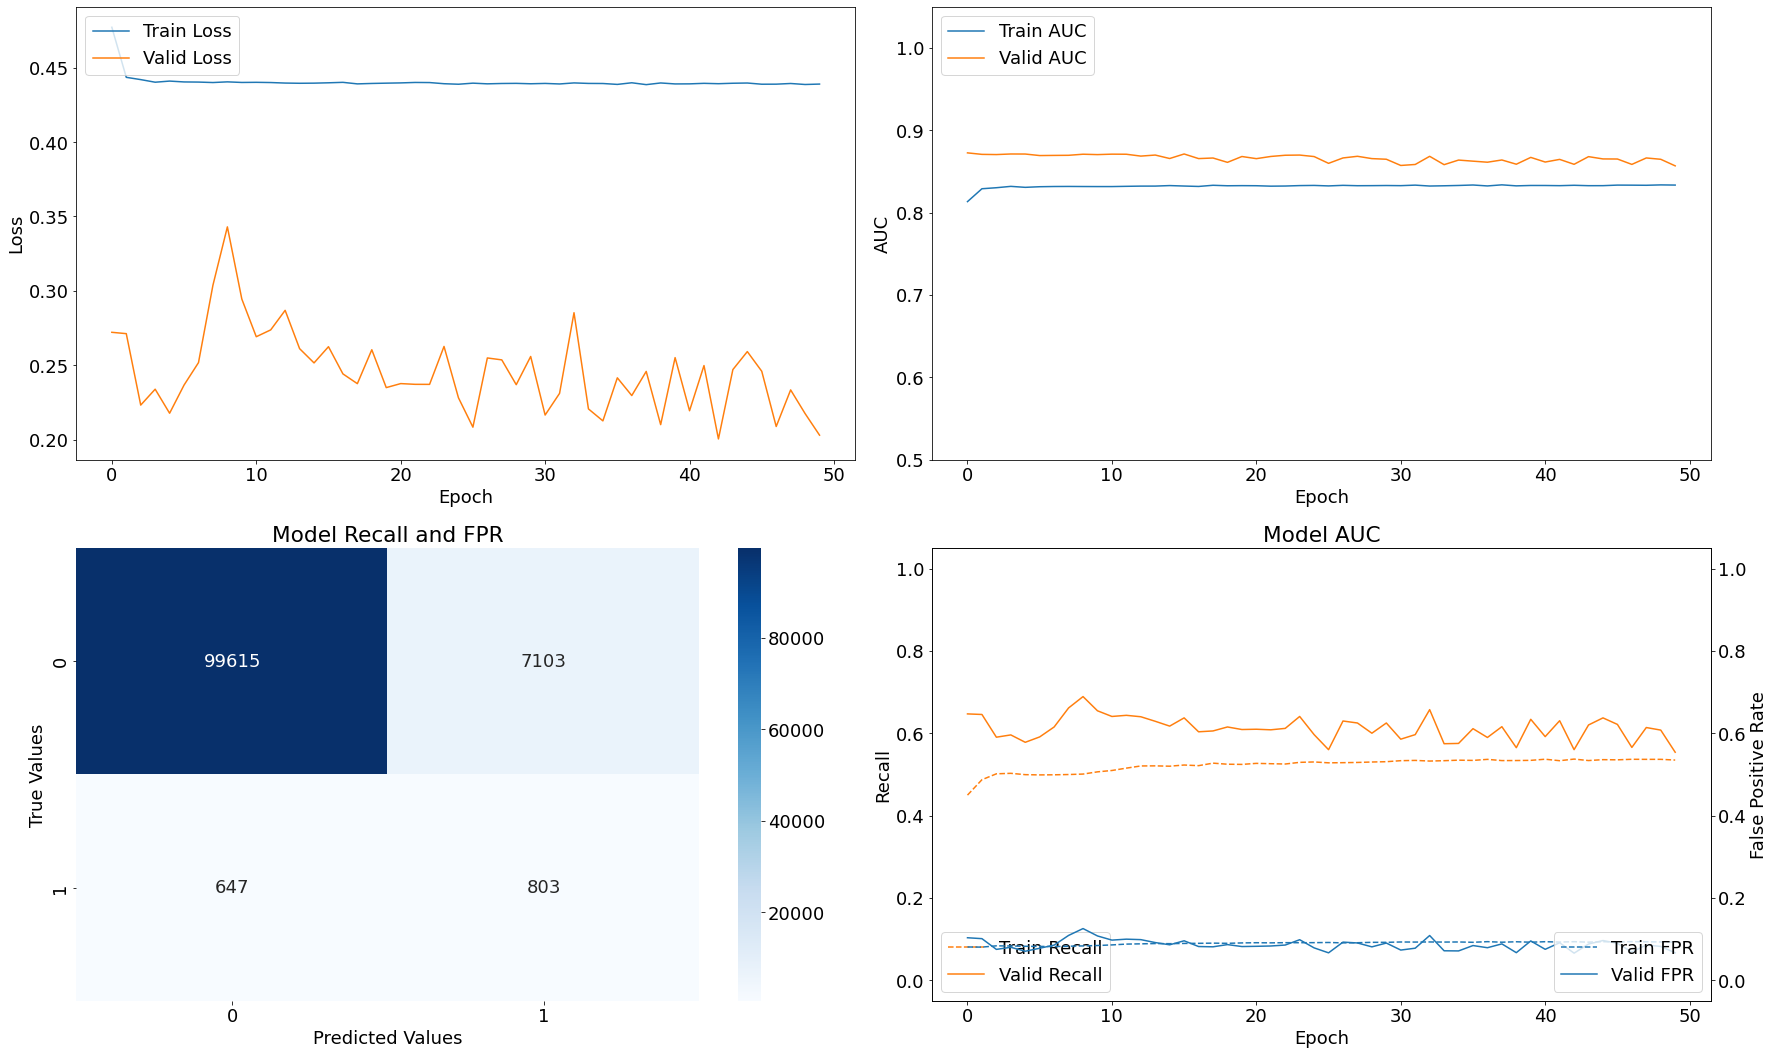

Results for Variant II Model V8 with threshold = 0.3.

 Train f1: 0.5773352511443968 
 Val f1: 0.1045875051746227 

 Train Recall: 0.651139497756958 
 Val Recall: 0.7641379237174988 

 Train FPR: 0.15113256871700287 
 Val FPR: 0.17457224428653717


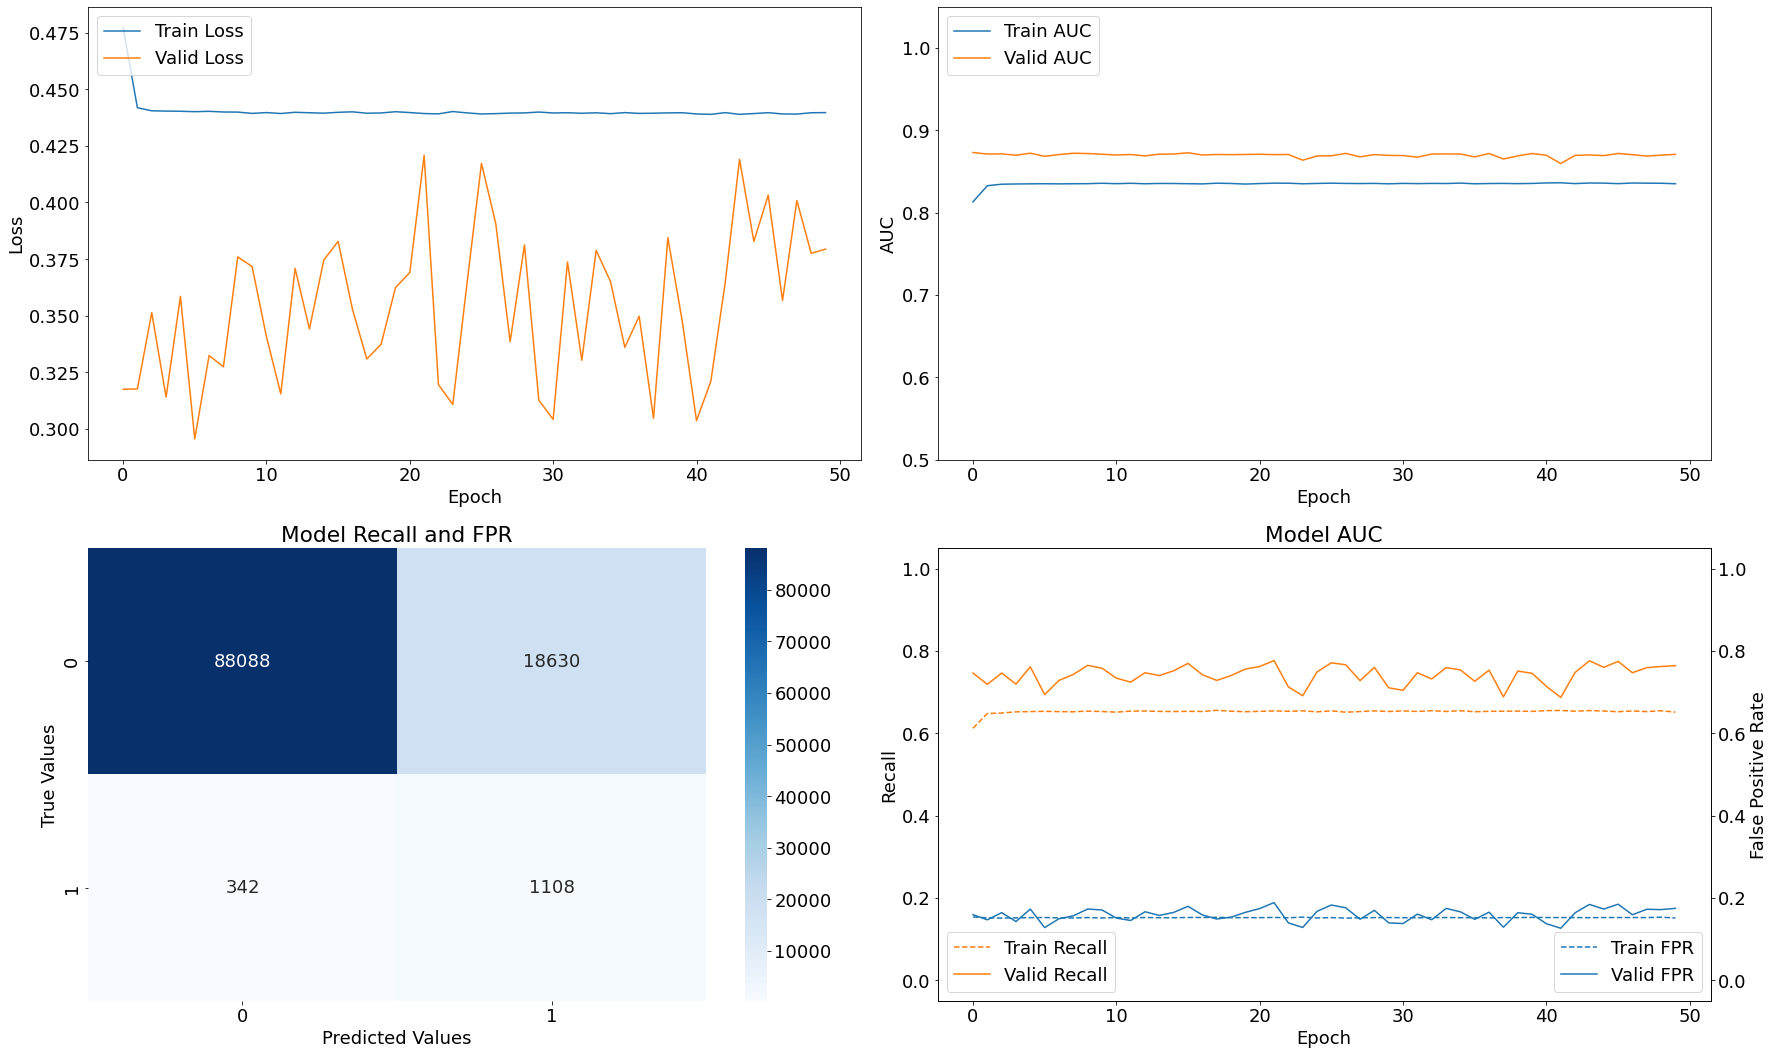

Results for Variant II Model V8 with threshold = 0.2.

 Train f1: 0.5741069514820506 
 Val f1: 0.13490795793693747 

 Train Recall: 0.7660402059555054 
 Val Recall: 0.6696551442146301 

 Train FPR: 0.2256471812725067 
 Val FPR: 0.1122022494673729


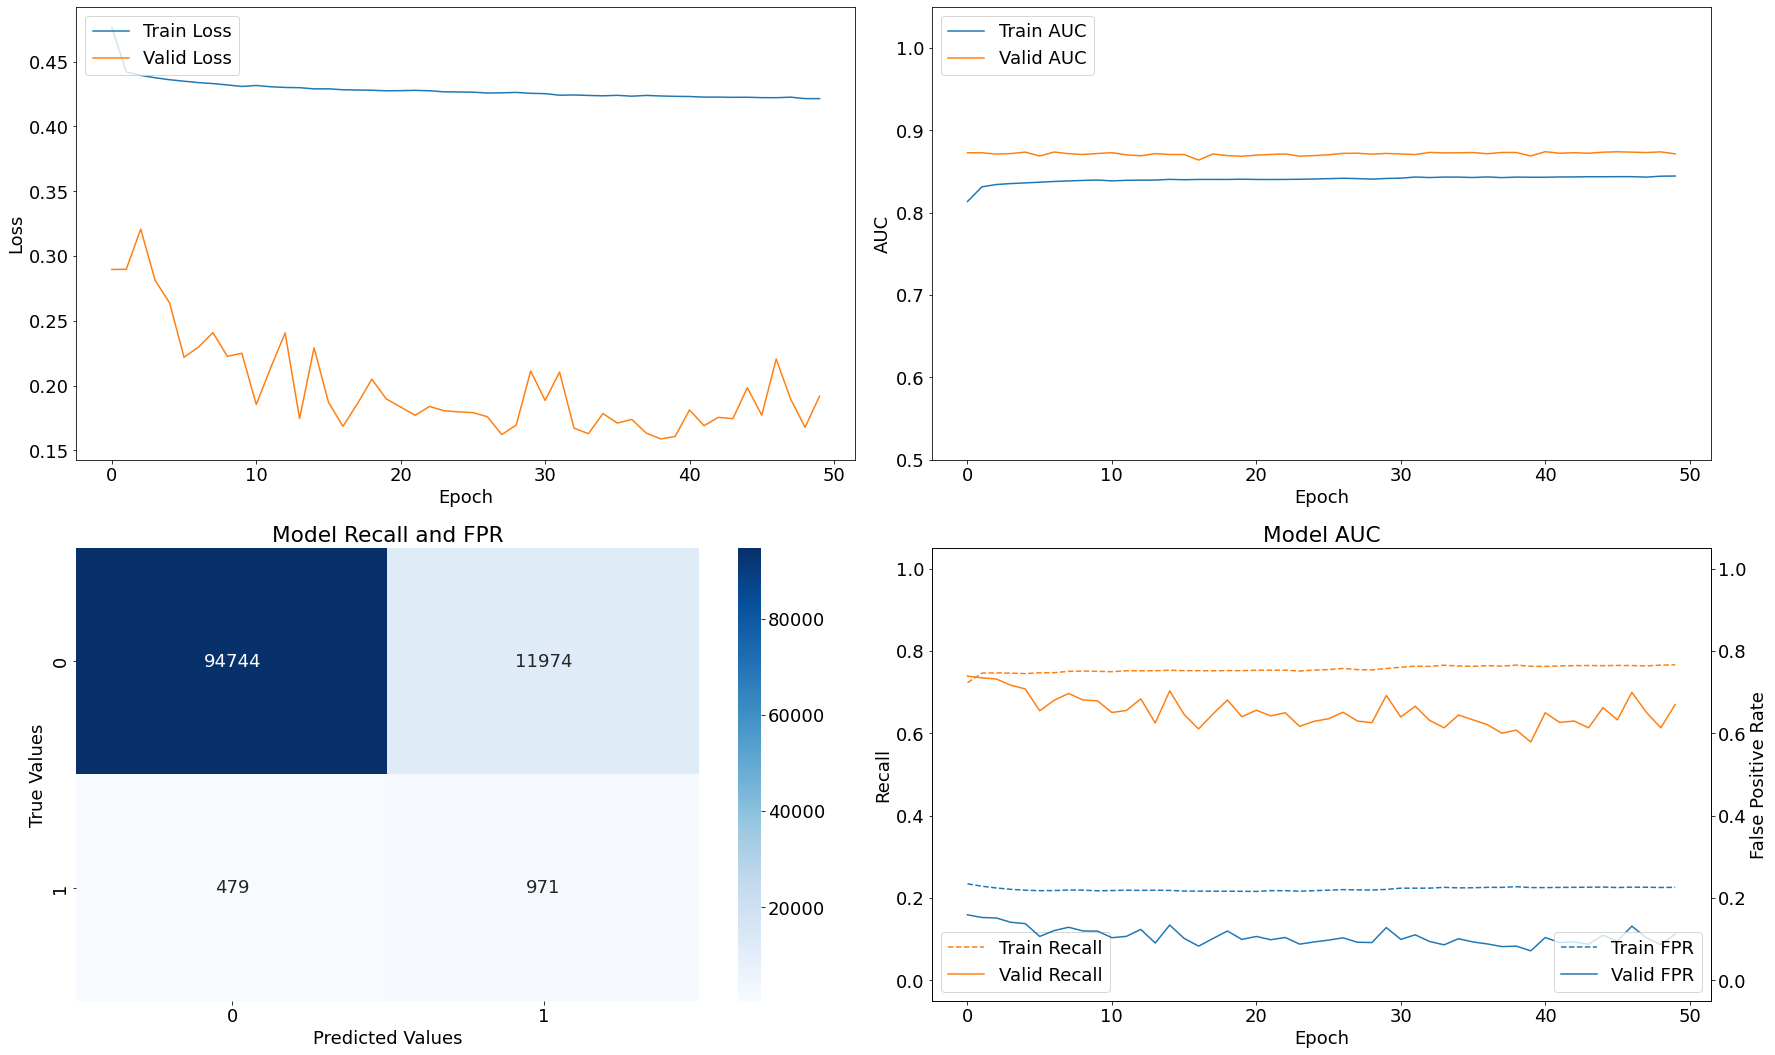

Results for Variant II Model V8 with threshold = 0.1.

 Train f1: 0.4940286147232404 
 Val f1: 0.07540027324330559 

 Train Recall: 0.8950022459030151 
 Val Recall: 0.8379310369491577 

 Train FPR: 0.4320680499076843 
 Val FPR: 0.27701979875564575


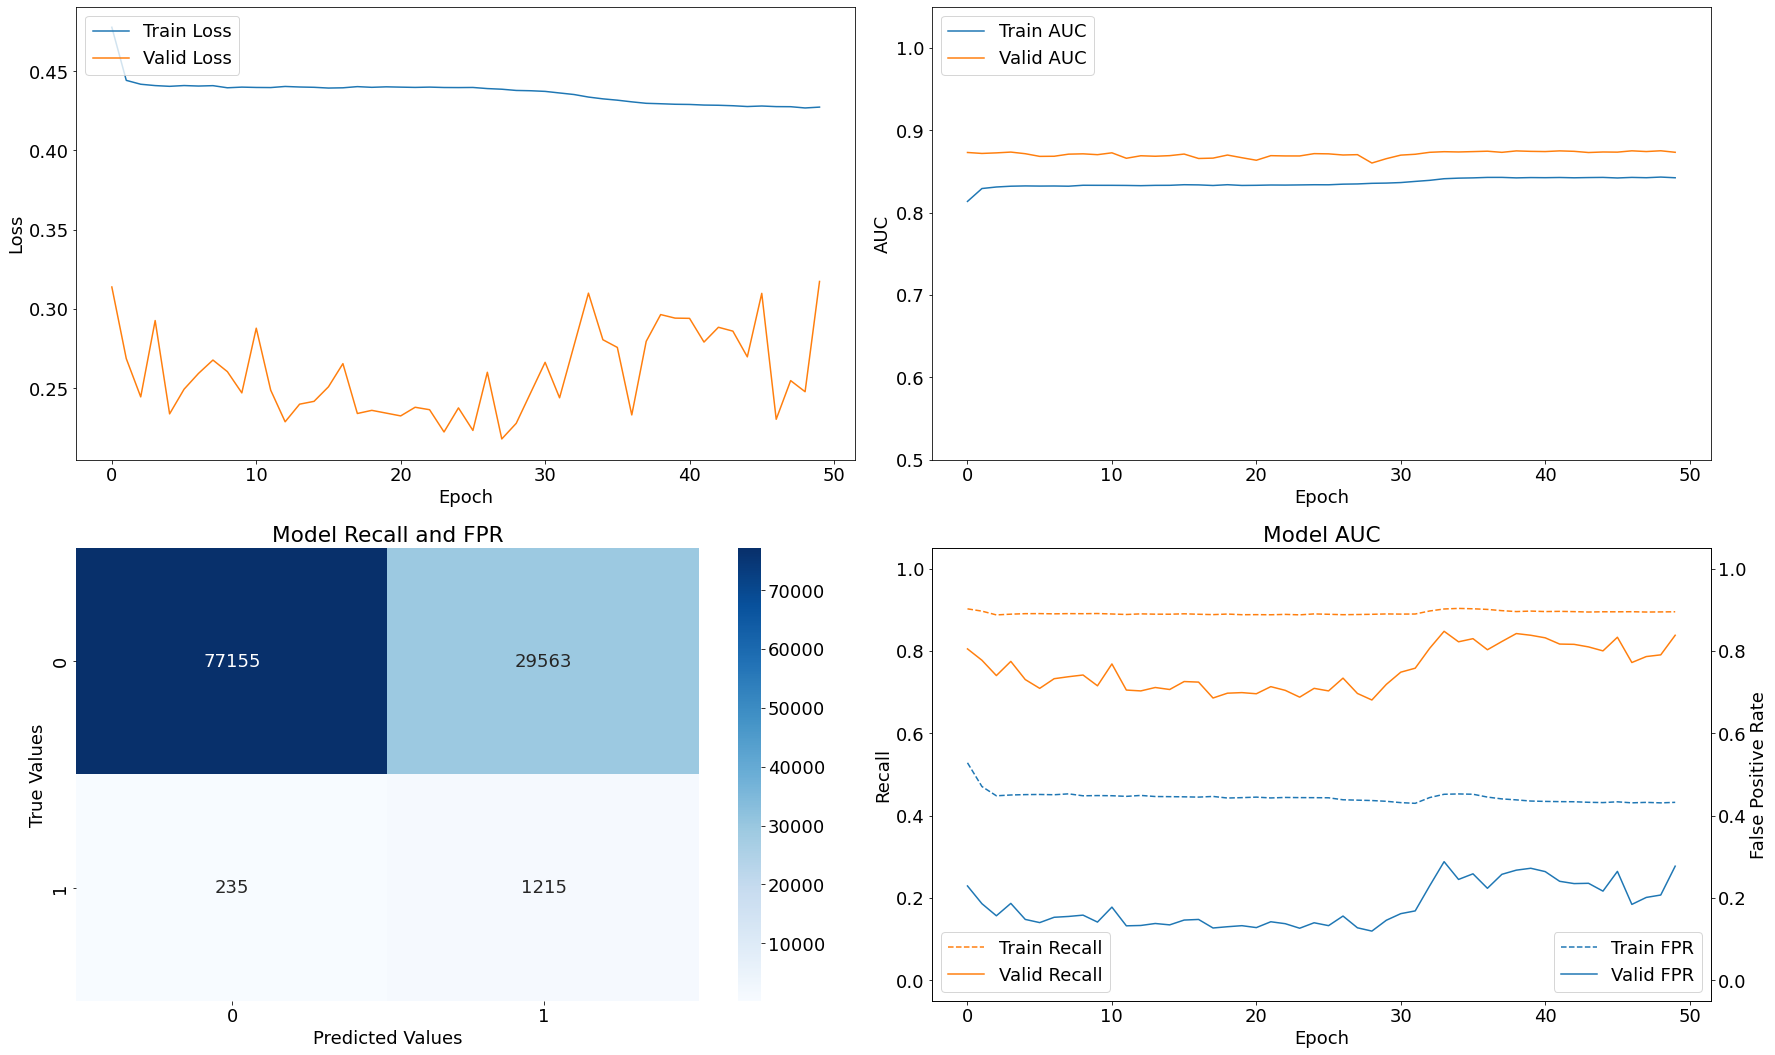

In [23]:
for t in thresholds:
    
    modelling_v8(X_train_v2_scaled_resampled,
                 y_train_v2_resampled,
                 X_val_v2_scaled,
                 y_val_v2,
                 'Variant II Model V8',
                 threshold=t)

---

### Ninth Model Iteration

In [24]:
def modelling_v9(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v9 = models.Sequential()

    model_v9.add(layers.Input(shape=(n_features, )))
    model_v9.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.Dense(1, activation='sigmoid'))

    model_v9.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v9_history = model_v9.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v9,
             name,
             model_v9_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00012: early stopping
Results for Variant II Model V9 with threshold = 0.5.

 Train f1: 0.5356801836569162 
 Val f1: 0.10734353663341462 

 Train Recall: 0.4461260139942169 
 Val Recall: 0.7641379237174988 

 Train FPR: 0.054879080504179 
 Val FPR: 0.16947469115257263


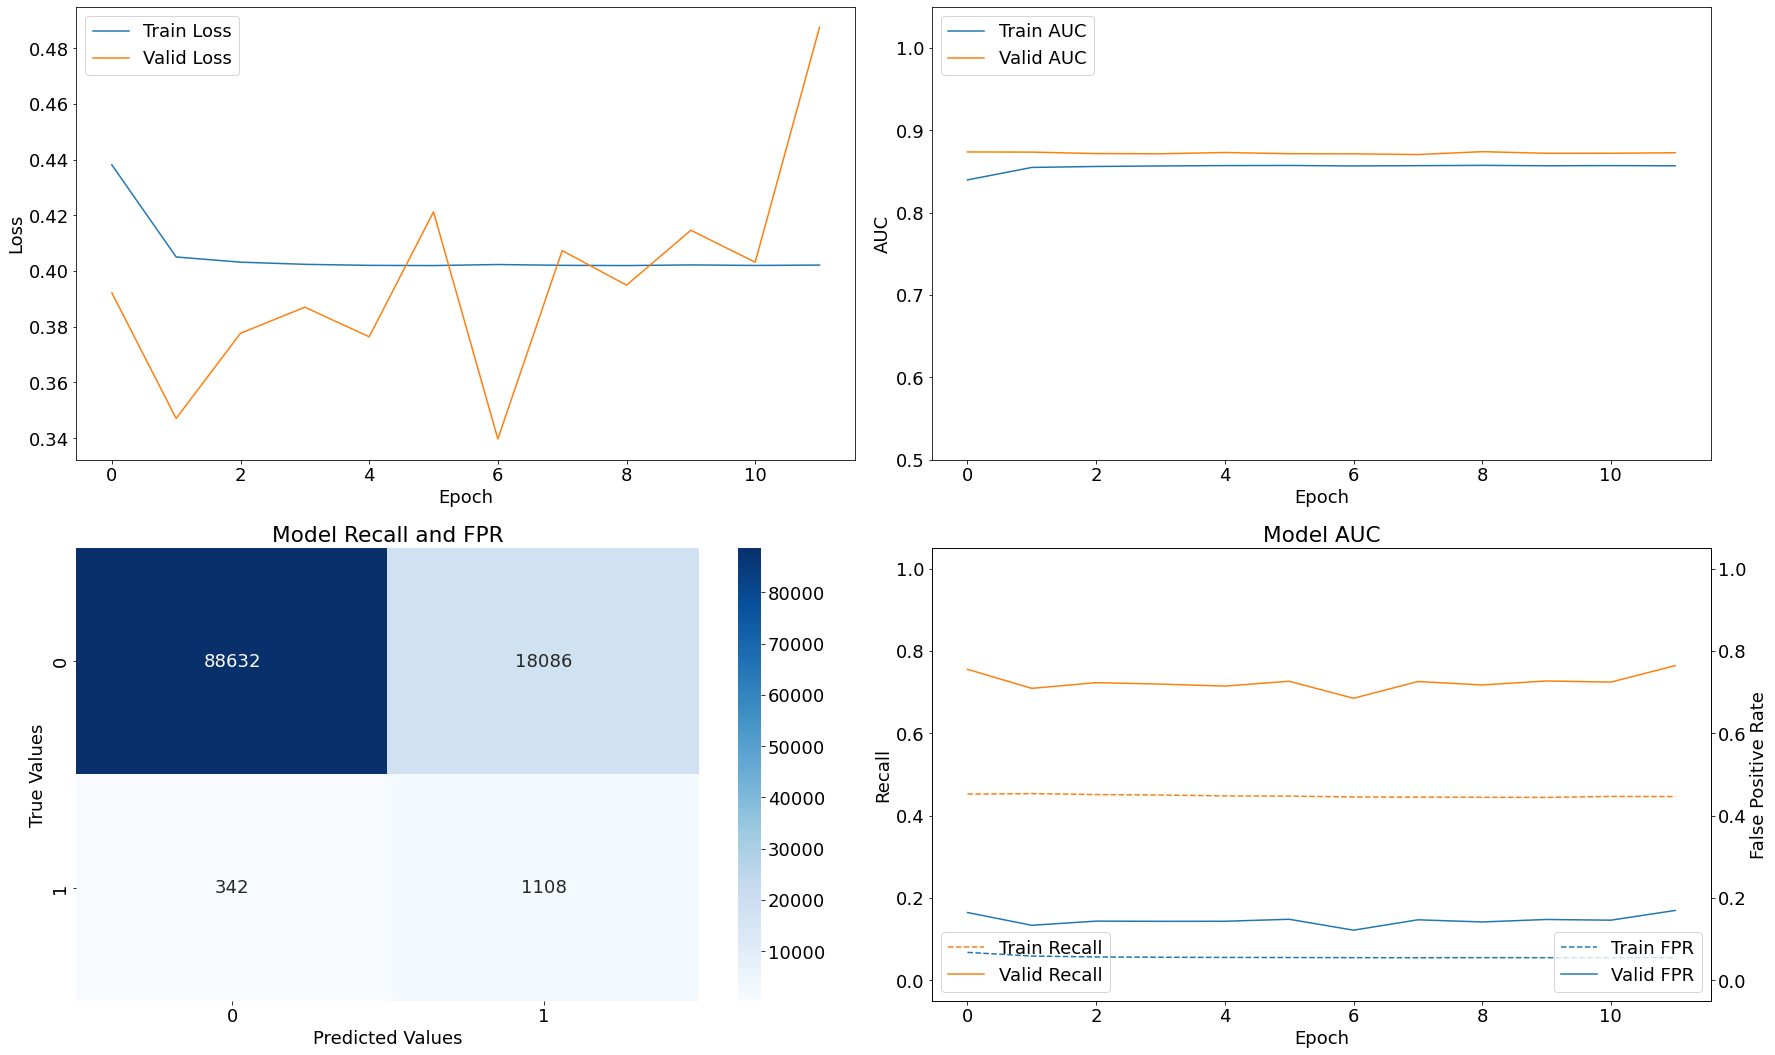

Epoch 00013: early stopping
Results for Variant II Model V9 with threshold = 0.4.

 Train f1: 0.601381380376221 
 Val f1: 0.12764593056443593 

 Train Recall: 0.5771927237510681 
 Val Recall: 0.6862068772315979 

 Train FPR: 0.08559057116508484 
 Val FPR: 0.12317509949207306


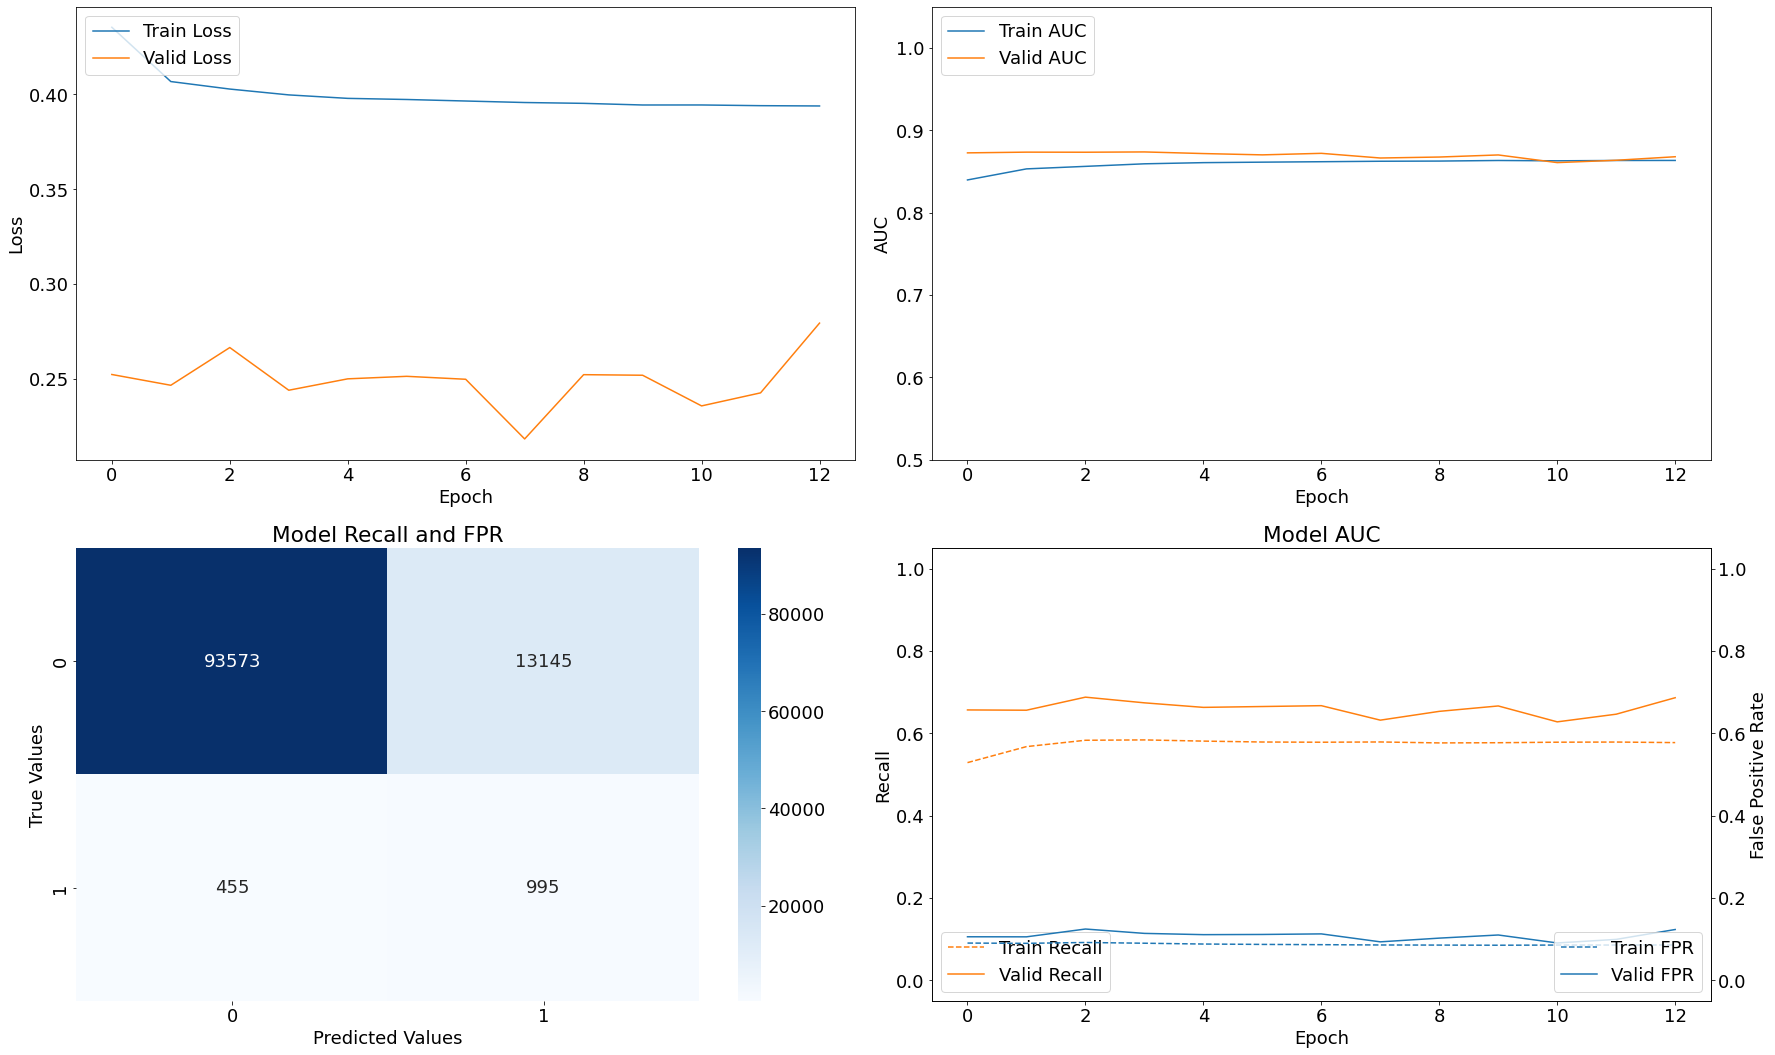

Epoch 00008: early stopping
Results for Variant II Model V9 with threshold = 0.3.

 Train f1: 0.6080700653311045 
 Val f1: 0.11425174125931366 

 Train Recall: 0.6907106637954712 
 Val Recall: 0.7289655208587646 

 Train FPR: 0.14527495205402374 
 Val FPR: 0.14989036321640015


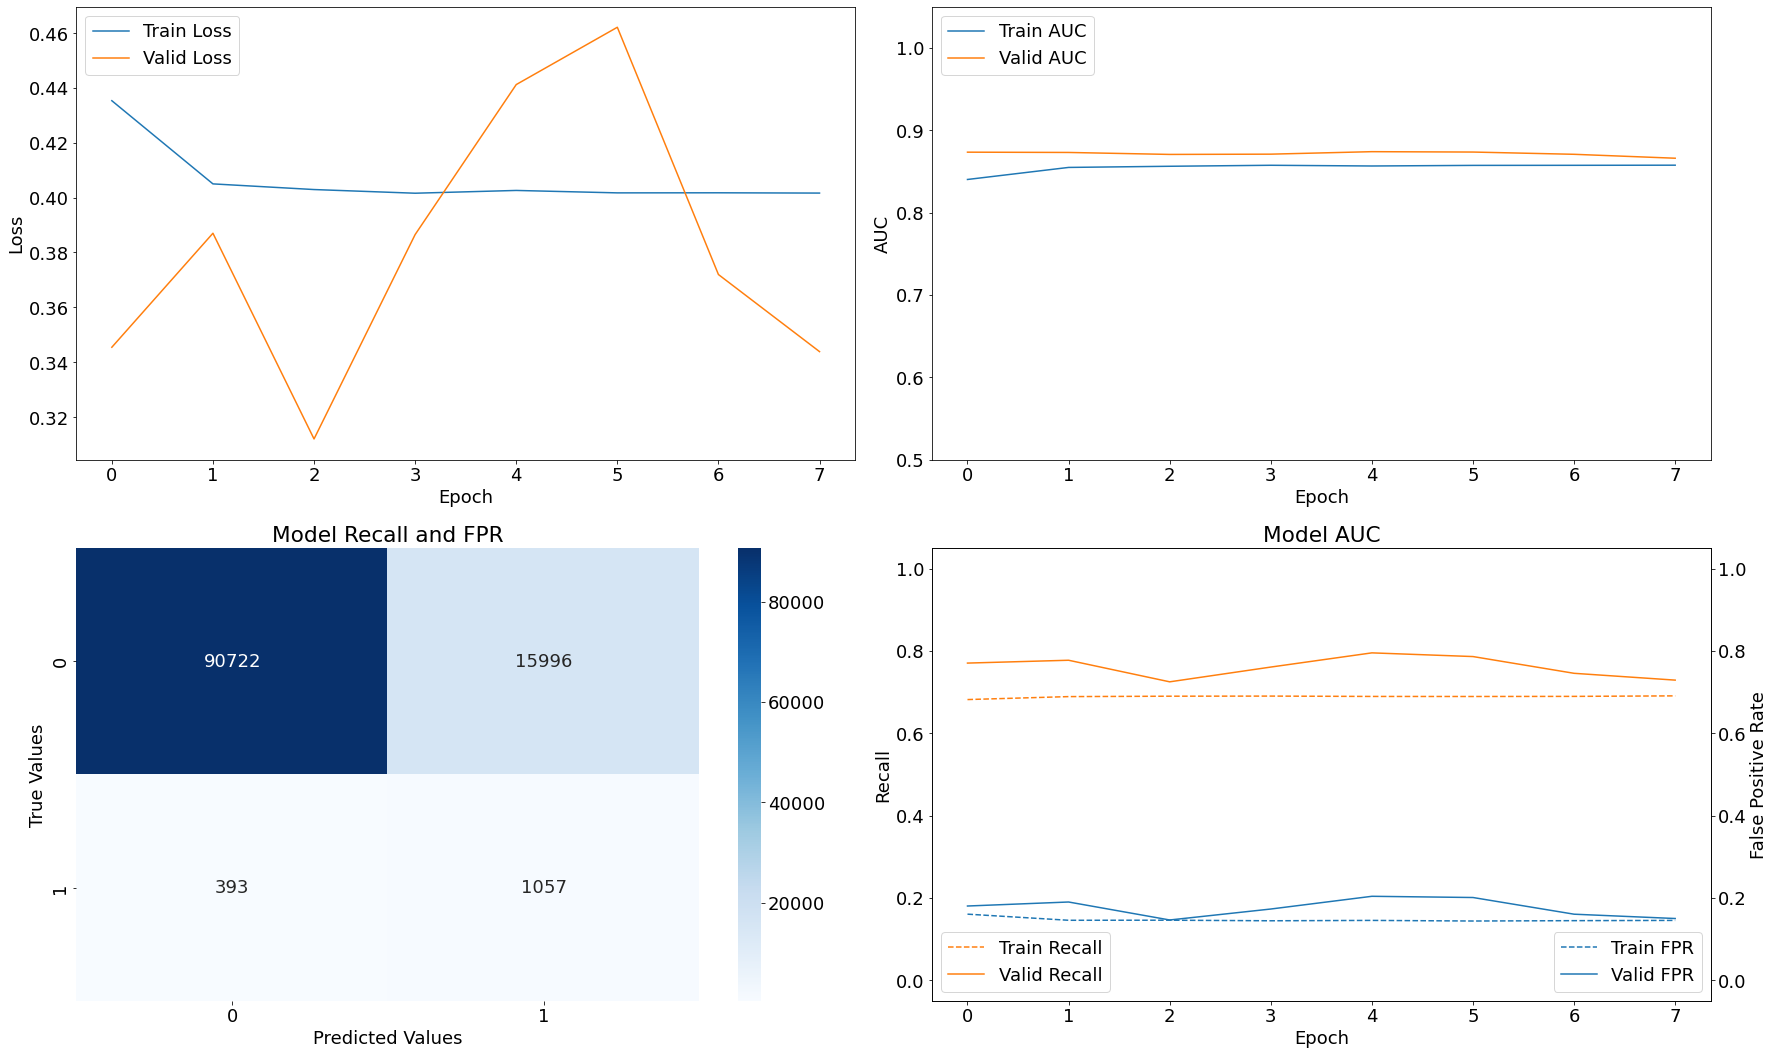

Epoch 00006: early stopping
Results for Variant II Model V9 with threshold = 0.2.

 Train f1: 0.5908091146529967 
 Val f1: 0.11565874759494747 

 Train Recall: 0.7852055430412292 
 Val Recall: 0.7386206984519958 

 Train FPR: 0.21821491420269012 
 Val FPR: 0.14991848170757294


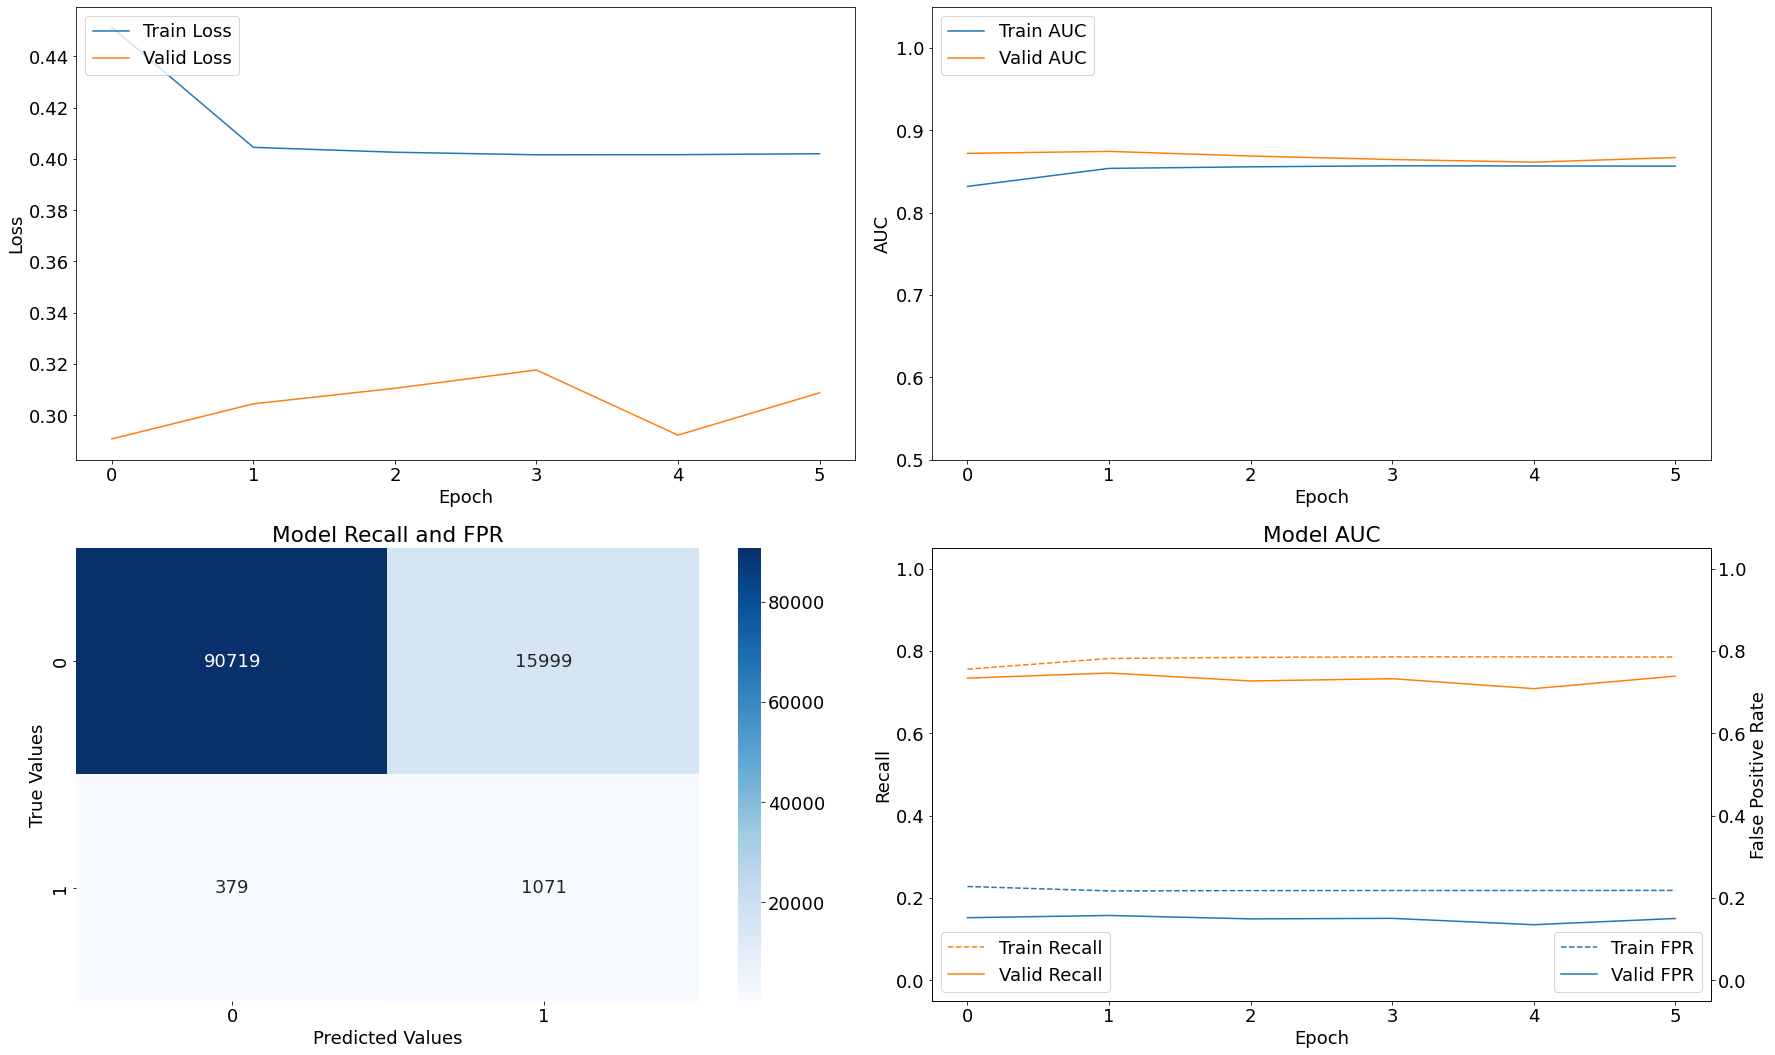

Epoch 00008: early stopping
Results for Variant II Model V9 with threshold = 0.1.

 Train f1: 0.5300123155713048 
 Val f1: 0.11211138049596324 

 Train Recall: 0.8937466144561768 
 Val Recall: 0.7386206984519958 

 Train FPR: 0.36969950795173645 
 Val FPR: 0.15540958940982819


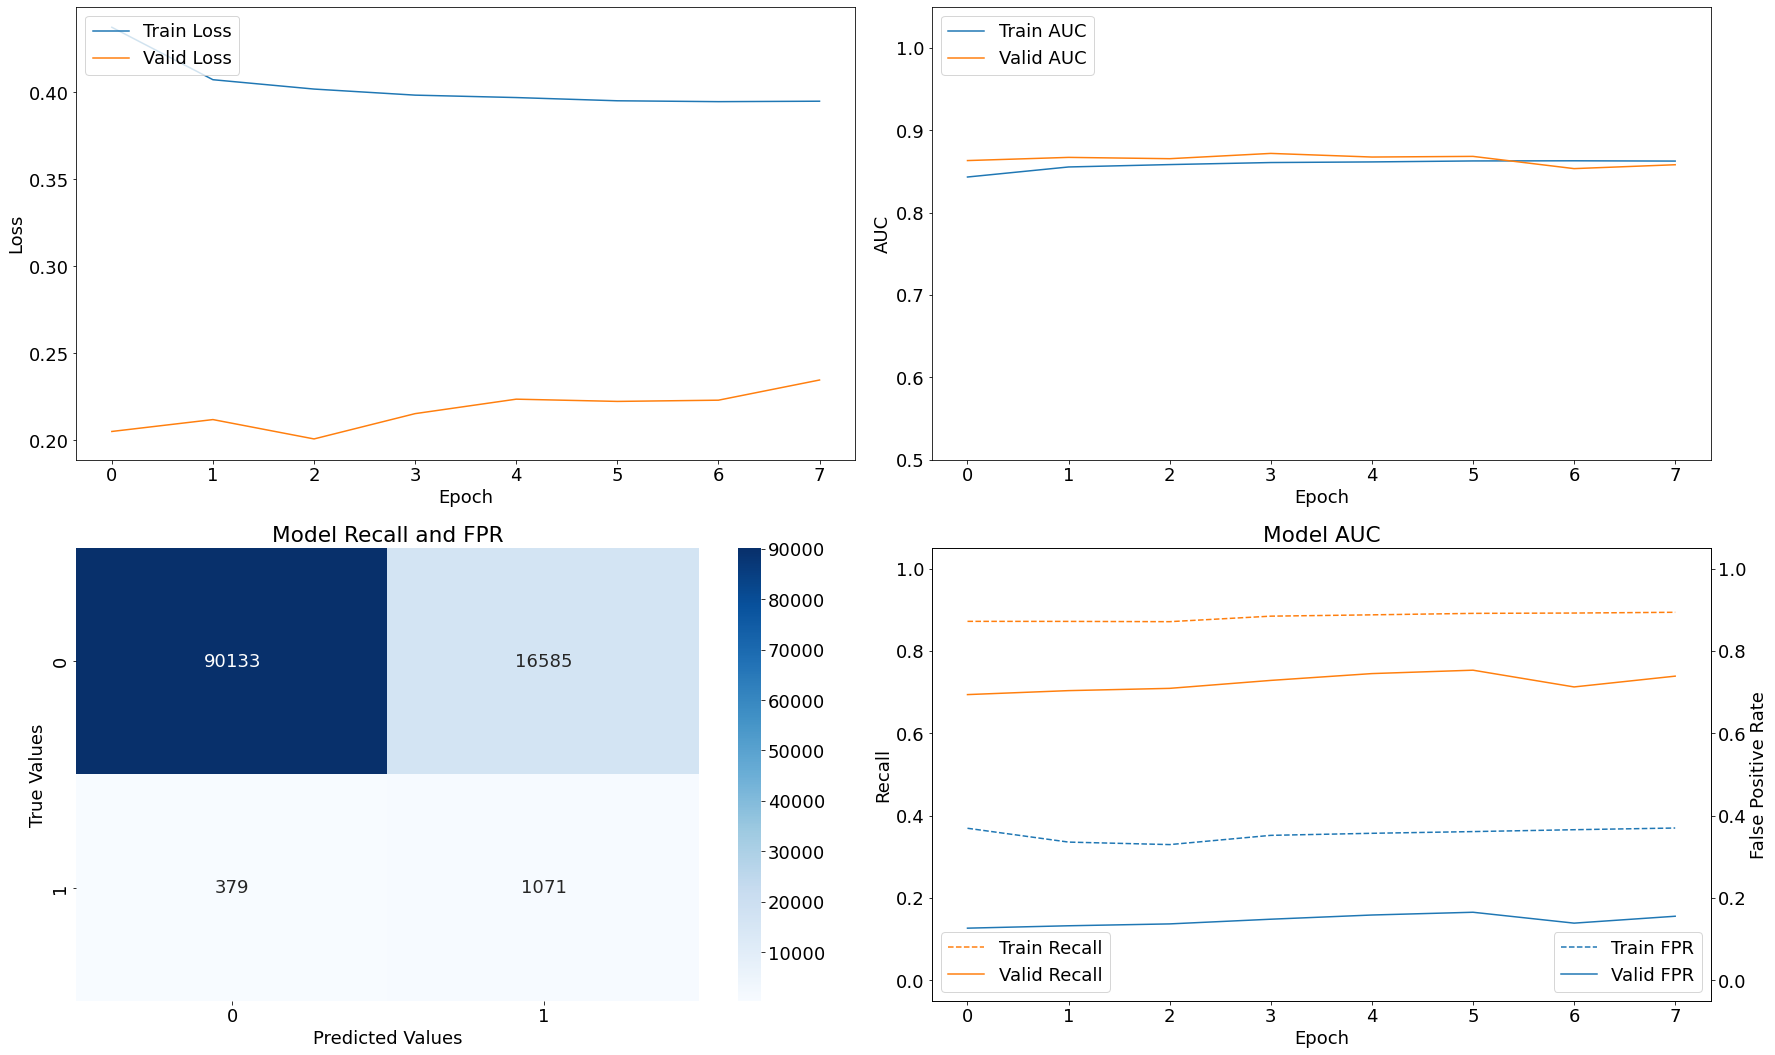

In [25]:
for t in thresholds:
    
    modelling_v9(X_train_v2_scaled_resampled,
                 y_train_v2_resampled,
                 X_val_v2_scaled,
                 y_val_v2,
                 'Variant II Model V9',
                 threshold=t)

---